In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/DL_Project/')

# Importing required libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Reshape, Concatenate, Conv2D, LeakyReLU, Flatten, Dropout, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

# Basic exploration of image data

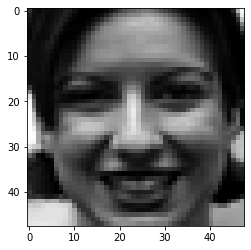

In [5]:
img1 = plt.imread('/content/drive/MyDrive/DL_Project/CK+48/happy/S010_006_00000013.png')
plt.imshow(img1, cmap = 'gray');

In [6]:
img1.shape

(48, 48)

# Generator

In [7]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=7):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 12 * 12
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((12, 12, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 12x12 image
	n_nodes = 128 * 12 * 12
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((12, 12, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (8,8), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model
define_generator(latent_dim = 500,n_classes=7).summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 18432)        9234432     input_2[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        350         input_1[0][0]                    
______________________________________________________________________________________________

# Discriminator

In [8]:
# define the standalone discriminator model
def define_discriminator(in_shape=(48,48,1), n_classes=7):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

define_discriminator().summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        350         input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 2304)      117504      embedding_1[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 48, 48, 1)]  0                                            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
!pip install split-folders

In [13]:
import splitfolders
splitfolders.ratio('CK+48', output="output", seed=1337, ratio=(.8, 0,0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 16 files [00:00, 154.60 files/s]
Copying files: 22 files [00:00, 82.61 files/s] 
Copying files: 38 files [00:00, 96.24 files/s]
Copying files: 46 files [00:00, 69.25 files/s]
Copying files: 58 files [00:00, 71.31 files/s]
Copying files: 75 files [00:00, 86.16 files/s]
Copying files: 85 files [00:00, 78.62 files/s]
Copying files: 94 files [00:01, 70.71 files/s]
Copying files: 111 files [00:01, 74.92 files/s]
Copying files: 128 files [00:01, 77.68 files/s]
Copying files: 145 files [00:01, 80.02 files/s]
Copying files: 161 files [00:01, 92.58 files/s]
Copying files: 172 files [00:01, 88.54 files/s]
Copying files: 182 files [00:02, 78.68 files/s]
Copying files: 198 files [00:02, 79.44 files/s]
Copying files: 215 files [00:02, 93.93 files/s]
Copying files: 226 files [00:02, 85.28 files/s]
Copying files: 236 files [00:02, 77.85 files/s]
Copying files: 250 files [00:02, 77.44 files/s]
Copying files: 267 files [00:03, 79.73 files/s]
Cop

In [14]:
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk('output/train/'):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
print('Total number of files',totalFiles)

Searching in :  output/train/
Searching in :  output/train/sadness
Searching in :  output/train/contempt
Searching in :  output/train/anger
Searching in :  output/train/happy
Searching in :  output/train/disgust
Searching in :  output/train/surprise
Searching in :  output/train/fear
Total number of files 260


# Create Dataset with labels

In [15]:
def create_dataset():
  total_images = 260
  img_arr = np.empty(shape=(total_images,48,48,1))
  img_label = np.empty(shape=(total_images),dtype = 'int')
  label_to_text = {}

  i = 0
  e = 0
  for dir_ in os.listdir('output/train/'):
      if dir_ in os.listdir('output/train/'):
          label_to_text[e] = dir_
          for f in os.listdir('output/train/' + "/" + dir_ + "/"):
              base_img = cv2.imread('output/train/' + "/"+ dir_ + "/" + f,0)
              img_arr[i] = np.reshape(base_img, (48,48,1))
              img_label[i] = e
              i += 1
          print(f"loaded all {dir_} images to numpy arrays")
          e += 1
  return img_arr, img_label, label_to_text

# GAN creation

In [16]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
  # load dataset
  trainX, trainy, label_to_text = create_dataset()
  # expand to 3d, e.g. add channels
  X = np.expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  #trainy = trainy-1
  return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = np.random.randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = np.ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=7):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = np.random.randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = np.zeros((n_samples, 1))
	return [images, labels_input], y



# Training Function

In [17]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=6000, n_batch=14):
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		  # update discriminator model weights
      d_loss1, d_acc1 = d_model.train_on_batch([X_real, labels_real], y_real)
		  # generate 'fake' examples
      [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		  # update discriminator model weights

      d_loss2, d_acc2 = d_model.train_on_batch([X_fake, labels], y_fake)
		  # prepare points in latent space as input for the generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
		  # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
		  # update the generator via the discriminator's error
      g_loss= gan_model.train_on_batch([z_input, labels_input], y_gan)
		  # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d1acc = %.3f, d2=%.3f, d2acc = %.3f,gloss=%.3f' %
		    (i+1, j+1, bat_per_epo, d_loss1, d_acc1, d_loss2, d_acc2,g_loss))
  # save the generator model
  g_model.save('cgan_generator.h5')


# Create the model iteratively


Set 1 - 1000 epochs

In [20]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
>723, 6/18, d1=0.610, d1acc = 0.571, d2=0.492, d2acc = 1.000,gloss=0.907
>723, 7/18, d1=0.379, d1acc = 1.000, d2=0.499, d2acc = 0.857,gloss=1.159
>723, 8/18, d1=0.635, d1acc = 0.571, d2=0.550, d2acc = 0.571,gloss=1.072
>723, 9/18, d1=0.507, d1acc = 0.857, d2=0.417, d2acc = 0.857,gloss=0.863
>723, 10/18, d1=0.350, d1acc = 1.000, d2=0.585, d2acc = 0.857,gloss=1.243
>723, 11/18, d1=0.556, d1acc = 0.714, d2=0.509, d2acc = 0.857,gloss=0.859
>723, 12/18, d1=0.601, d1acc = 0.571, d2=0.419, d2acc = 1.000,gloss=0.992
>723, 13/18, d1=0.551, d1acc = 0.571, d2=0.693, d2acc = 0.571,gloss=1.142
>723, 14/18, d1=0.425, d1acc = 0.714, d2=0.630, d2acc = 0.571,gloss=1.138
>723, 15/18, d1=0.418, d1acc = 0.857, d2=0.306, d2acc = 1.000,gloss=1.017
>723, 16/18, d1=0.469, d1acc = 0.714, d2=0.525, d2acc = 0.857,gloss=1.380
>723, 17/18, d1=0.611, d1acc = 0.571, d2=0.675, d2acc = 0.714,gloss=1.155
>723, 18/18, d1=0.417, d1acc = 0.857, d2=0.559, d2acc = 0.571,glo

# 1000 epochs done

# Test the quality of generated images

************1*************
Label:  2
(48, 48)


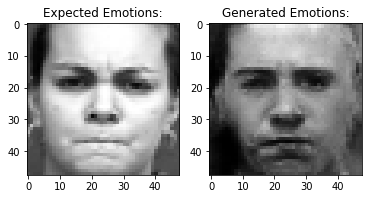

************2*************
Label:  2
(48, 48)


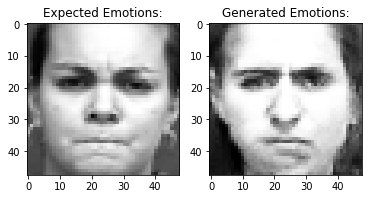

************3*************
Label:  5
(48, 48)


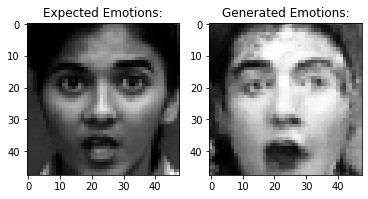

************4*************
Label:  4
(48, 48)


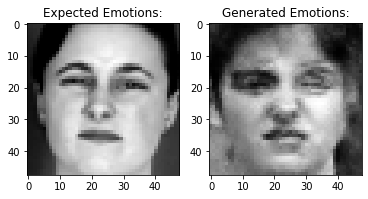

************5*************
Label:  1
(48, 48)


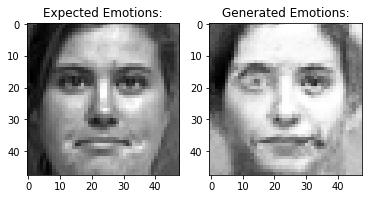

************6*************
Label:  6
(48, 48)


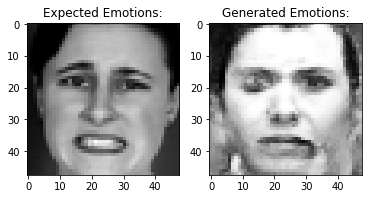

************7*************
Label:  4
(48, 48)


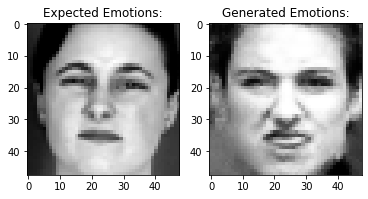

************8*************
Label:  3
(48, 48)


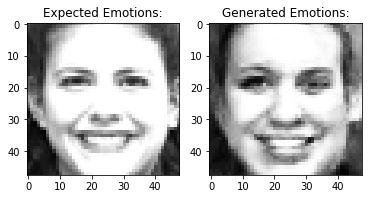

************9*************
Label:  5
(48, 48)


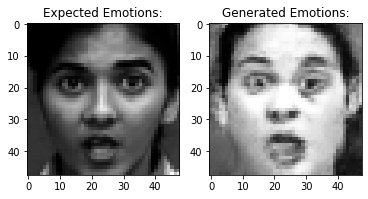

************10*************
Label:  0
(48, 48)


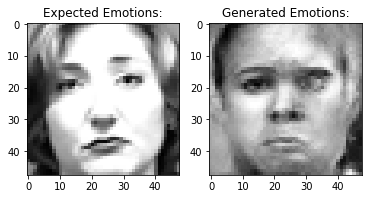

************11*************
Label:  3
(48, 48)


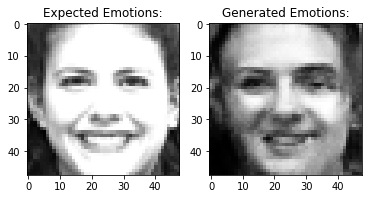

************12*************
Label:  2
(48, 48)


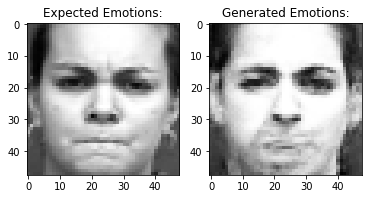

************13*************
Label:  2
(48, 48)


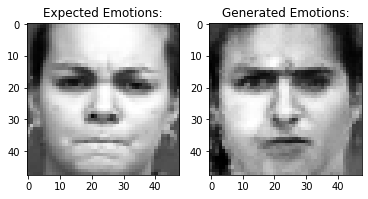

************14*************
Label:  6
(48, 48)


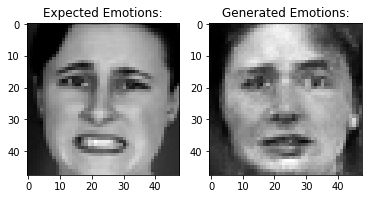

************15*************
Label:  2
(48, 48)


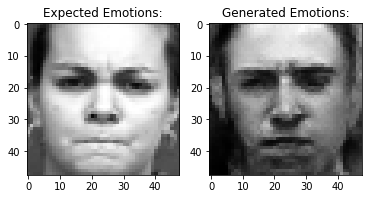

************16*************
Label:  3
(48, 48)


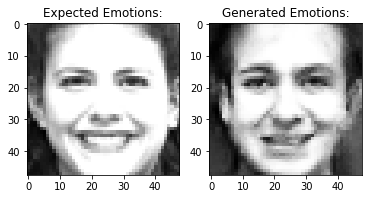

************17*************
Label:  5
(48, 48)


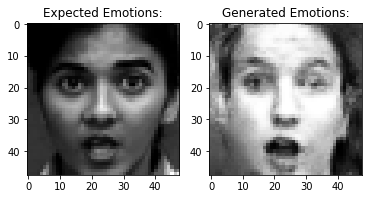

************18*************
Label:  2
(48, 48)


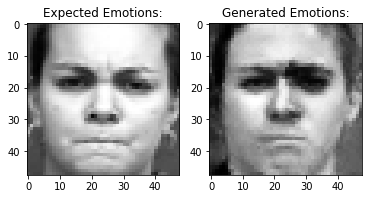

************19*************
Label:  6
(48, 48)


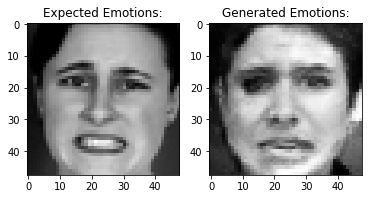

************20*************
Label:  5
(48, 48)


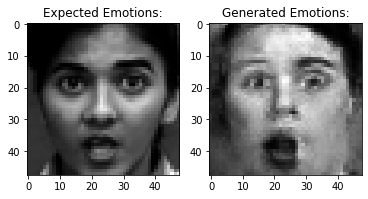

In [49]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=7):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n, labels):
	# plot images
  train = dataset[0]
  explabels = dataset[1]

  for i in range(n):
    print("************{}*************".format(i+1))
    print('Label: ', labels[i])
    exp_char_index = list(explabels).index(labels[i])
    plt.subplot(1,2,1)
    plt.title('Expected Emotions:')
    print(train[exp_char_index, :, :, 0, 0].shape)
    plt.imshow(train[exp_char_index, :, :, 0, 0], cmap='gray')
    plt.subplot(1,2,2)
    plt.title('Generated Emotions:')
    plt.imshow(examples[i, :, :, 0], cmap='gray')
    plt.show()


# load model
model = load_model('cgan_generator.h5')
# generate images
latent_points, labels = generate_latent_points(100, 20)
# specify labels
#labels = asarray([x for _ in range(20) for x in range(25)])
labels = np.random.randint(0,7,20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

# Training for 1000 more epochs

In [26]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=14):
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  #print(bat_per_epo)
  half_batch = int(n_batch / 2)
  #print(bat_per_epo, half_batch)
  #print(half_batch)

  # manually enumerate epochs
  for i in range(n_epochs):
    #print('Hello')
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      #print('here')
      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		  # update discriminator model weights
      #print('Hello')

      d_loss1, d_acc1 = d_model.train_on_batch([X_real, labels_real], y_real)
      #print('hi')
		  # generate 'fake' examples
      [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		  # update discriminator model weights

      d_loss2, d_acc2 = d_model.train_on_batch([X_fake, labels], y_fake)
		  # prepare points in latent space as input for the generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
		  # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
		  # update the generator via the discriminator's error
      g_loss= gan_model.train_on_batch([z_input, labels_input], y_gan)
		  # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d1acc = %.3f, d2=%.3f, d2acc = %.3f,gloss=%.3f' %
		    (i+1, j+1, bat_per_epo, d_loss1, d_acc1, d_loss2, d_acc2,g_loss))
  # save the generator model
  g_model.save('cgan_generator_2000.h5')
  
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000)

Streaming output truncated to the last 5000 lines.
>723, 6/18, d1=0.241, d1acc = 1.000, d2=1.046, d2acc = 0.714,gloss=1.764
>723, 7/18, d1=0.457, d1acc = 0.571, d2=0.431, d2acc = 0.857,gloss=2.092
>723, 8/18, d1=0.247, d1acc = 1.000, d2=0.178, d2acc = 1.000,gloss=1.645
>723, 9/18, d1=0.459, d1acc = 0.714, d2=0.334, d2acc = 0.857,gloss=1.811
>723, 10/18, d1=0.327, d1acc = 0.857, d2=0.394, d2acc = 0.714,gloss=1.970
>723, 11/18, d1=0.641, d1acc = 0.714, d2=0.443, d2acc = 0.571,gloss=1.997
>723, 12/18, d1=0.253, d1acc = 1.000, d2=0.238, d2acc = 0.857,gloss=1.698
>723, 13/18, d1=0.302, d1acc = 0.857, d2=0.304, d2acc = 1.000,gloss=1.651
>723, 14/18, d1=0.527, d1acc = 0.857, d2=0.495, d2acc = 0.714,gloss=1.877
>723, 15/18, d1=0.236, d1acc = 0.857, d2=0.479, d2acc = 0.714,gloss=1.812
>723, 16/18, d1=0.310, d1acc = 0.857, d2=0.756, d2acc = 0.429,gloss=1.928
>723, 17/18, d1=0.309, d1acc = 0.857, d2=0.044, d2acc = 1.000,gloss=2.272
>723, 18/18, d1=0.191, d1acc = 1.000, d2=0.119, d2acc = 1.000,glo

************1*************
Label:  4
(48, 48)


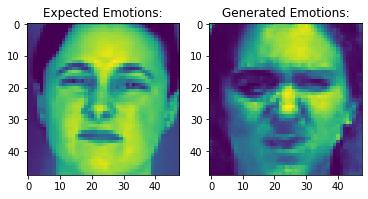

************2*************
Label:  5
(48, 48)


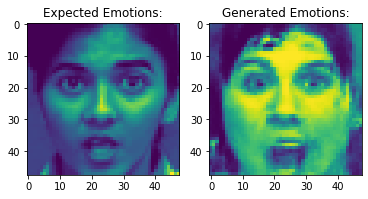

************3*************
Label:  6
(48, 48)


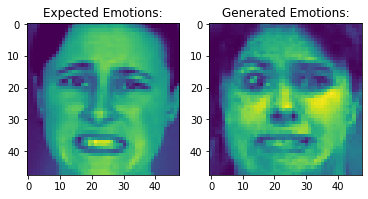

************4*************
Label:  3
(48, 48)


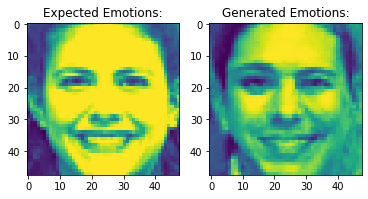

************5*************
Label:  3
(48, 48)


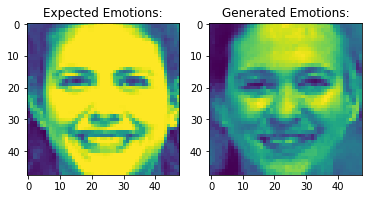

************6*************
Label:  4
(48, 48)


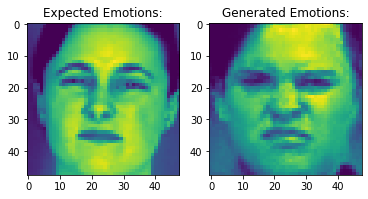

************7*************
Label:  3
(48, 48)


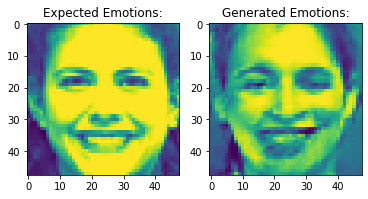

************8*************
Label:  3
(48, 48)


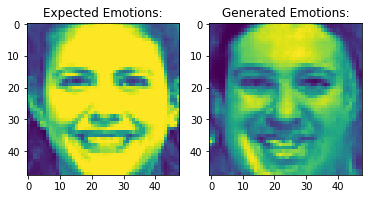

************9*************
Label:  1
(48, 48)


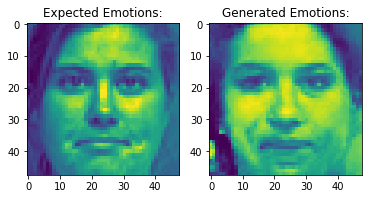

************10*************
Label:  0
(48, 48)


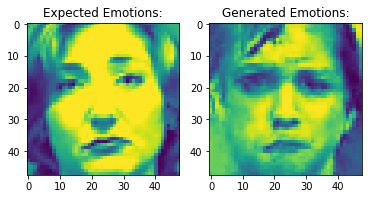

************11*************
Label:  0
(48, 48)


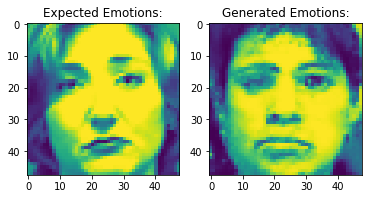

************12*************
Label:  3
(48, 48)


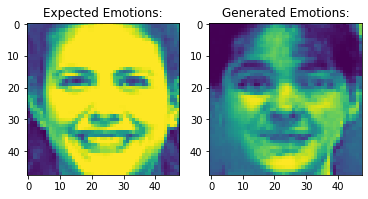

************13*************
Label:  0
(48, 48)


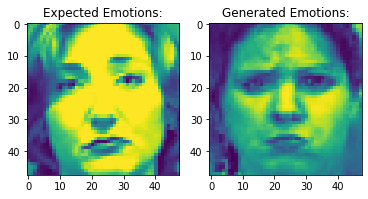

************14*************
Label:  5
(48, 48)


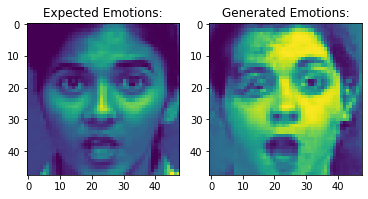

************15*************
Label:  2
(48, 48)


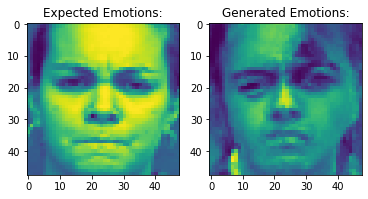

************16*************
Label:  5
(48, 48)


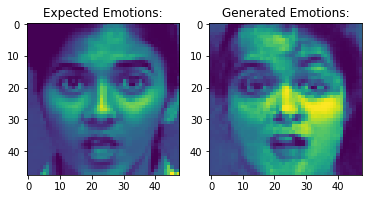

************17*************
Label:  4
(48, 48)


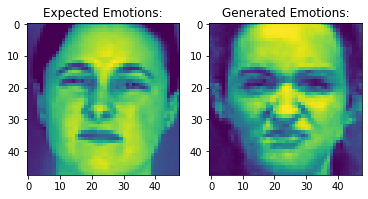

************18*************
Label:  3
(48, 48)


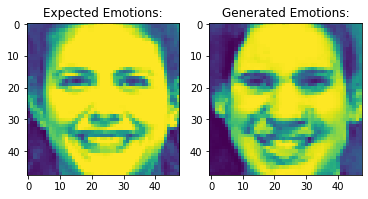

************19*************
Label:  1
(48, 48)


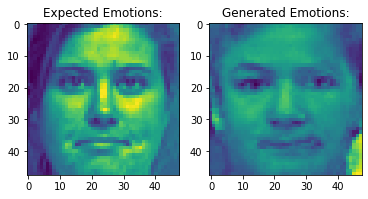

************20*************
Label:  5
(48, 48)


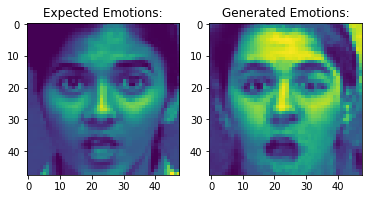

In [27]:
# load model
model = load_model('cgan_generator_2000.h5')
# generate images
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(0,7,20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels, )

# How does the model do with specific emotions?

In [28]:
i, l,lt = create_dataset()
lt

loaded all sadness images to numpy arrays
loaded all contempt images to numpy arrays
loaded all anger images to numpy arrays
loaded all happy images to numpy arrays
loaded all disgust images to numpy arrays
loaded all surprise images to numpy arrays
loaded all fear images to numpy arrays


{0: 'sadness',
 1: 'contempt',
 2: 'anger',
 3: 'happy',
 4: 'disgust',
 5: 'surprise',
 6: 'fear'}

************1*************
Label:  0
(48, 48)


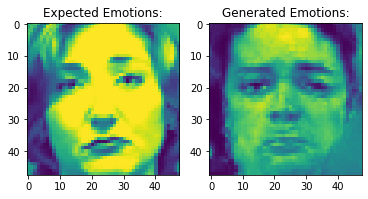

************2*************
Label:  0
(48, 48)


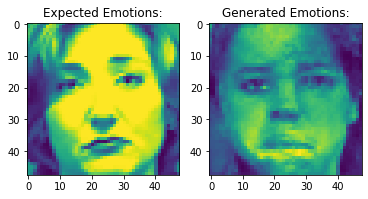

************3*************
Label:  0
(48, 48)


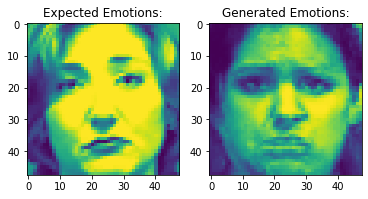

************4*************
Label:  0
(48, 48)


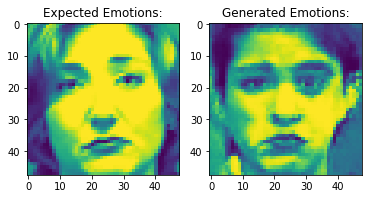

************5*************
Label:  0
(48, 48)


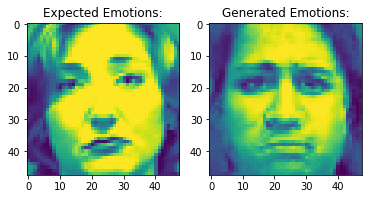

************6*************
Label:  0
(48, 48)


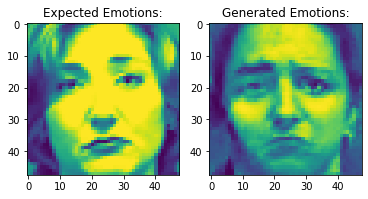

************7*************
Label:  0
(48, 48)


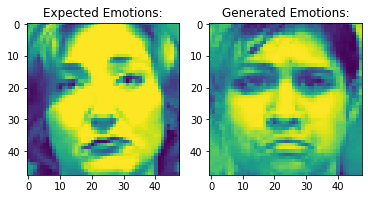

************8*************
Label:  0
(48, 48)


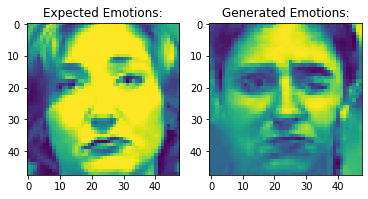

************9*************
Label:  0
(48, 48)


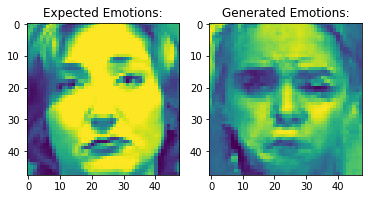

************10*************
Label:  0
(48, 48)


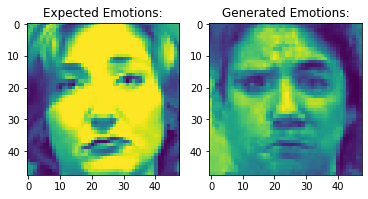

************11*************
Label:  0
(48, 48)


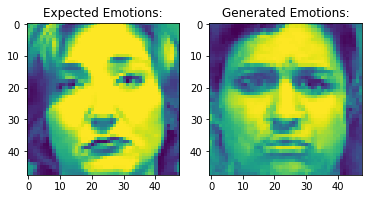

************12*************
Label:  0
(48, 48)


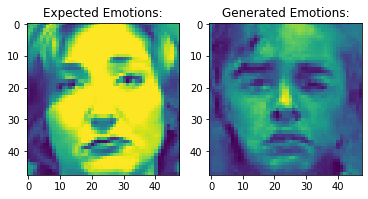

************13*************
Label:  0
(48, 48)


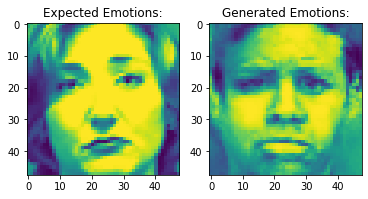

************14*************
Label:  0
(48, 48)


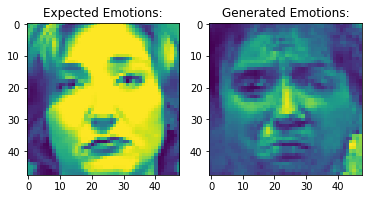

************15*************
Label:  0
(48, 48)


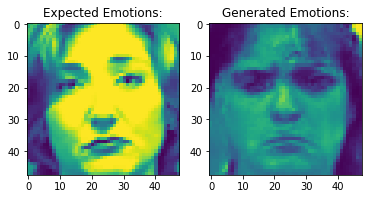

************16*************
Label:  0
(48, 48)


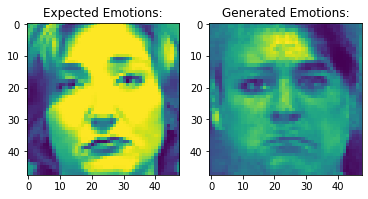

************17*************
Label:  0
(48, 48)


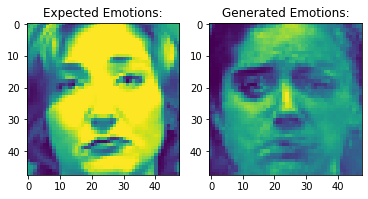

************18*************
Label:  0
(48, 48)


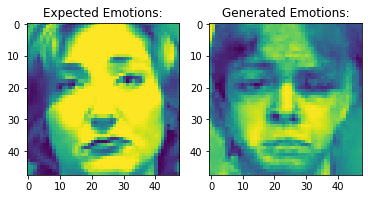

************19*************
Label:  0
(48, 48)


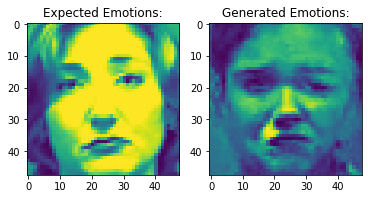

************20*************
Label:  0
(48, 48)


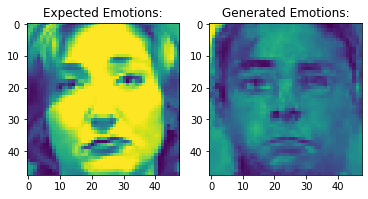

************21*************
Label:  0
(48, 48)


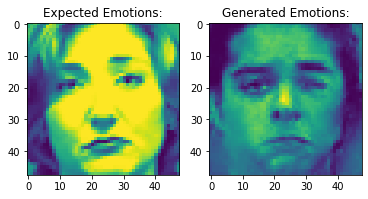

************22*************
Label:  0
(48, 48)


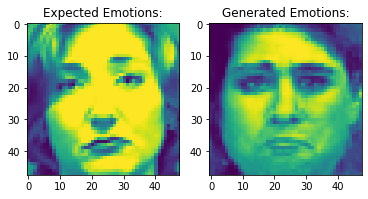

************23*************
Label:  0
(48, 48)


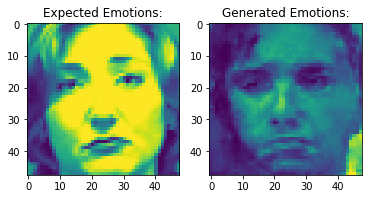

************24*************
Label:  0
(48, 48)


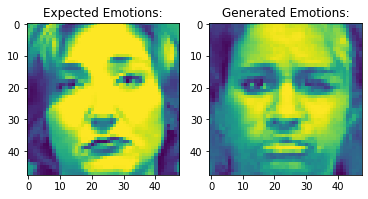

************25*************
Label:  0
(48, 48)


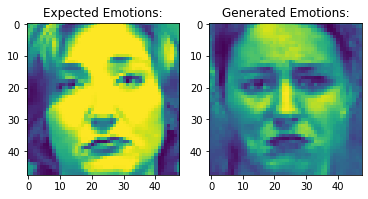

************26*************
Label:  0
(48, 48)


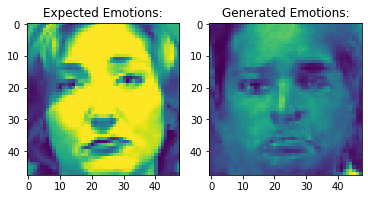

************27*************
Label:  0
(48, 48)


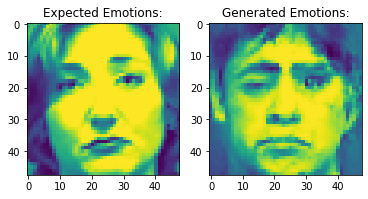

************28*************
Label:  0
(48, 48)


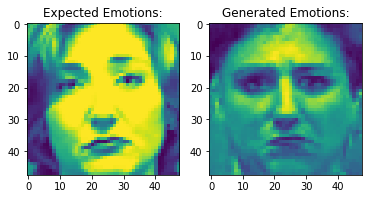

************29*************
Label:  0
(48, 48)


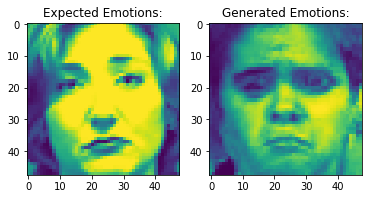

************30*************
Label:  0
(48, 48)


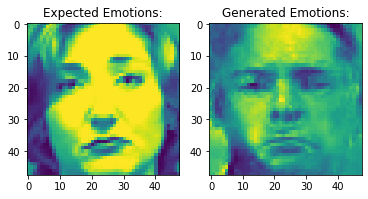

************31*************
Label:  0
(48, 48)


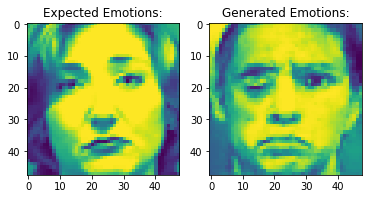

************32*************
Label:  0
(48, 48)


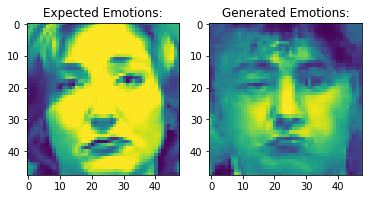

************33*************
Label:  0
(48, 48)


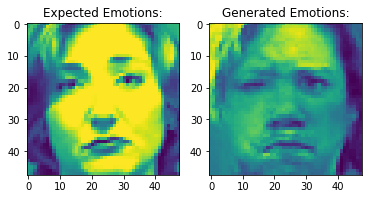

************34*************
Label:  0
(48, 48)


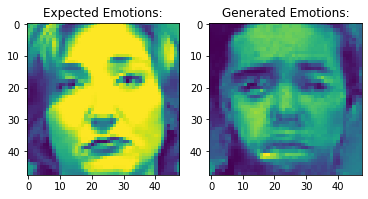

************35*************
Label:  0
(48, 48)


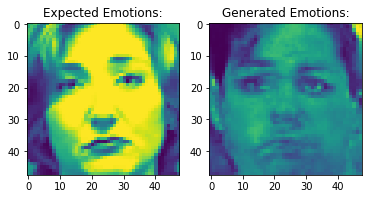

************36*************
Label:  0
(48, 48)


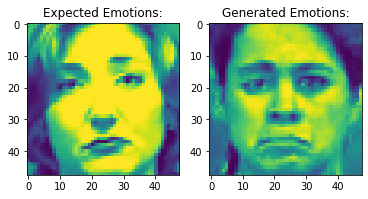

************37*************
Label:  0
(48, 48)


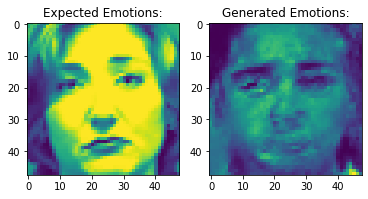

************38*************
Label:  0
(48, 48)


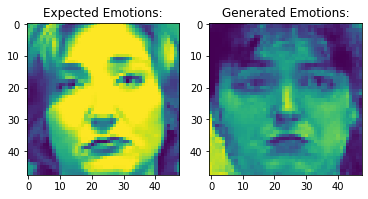

************39*************
Label:  0
(48, 48)


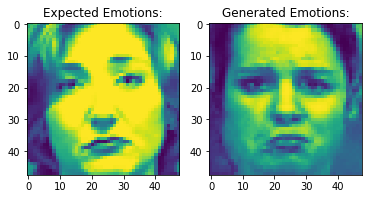

************40*************
Label:  0
(48, 48)


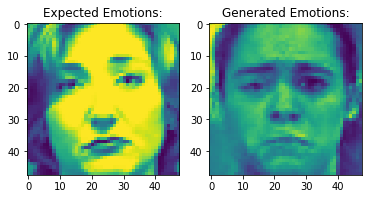

************41*************
Label:  0
(48, 48)


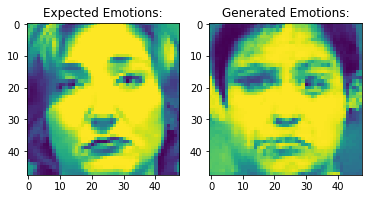

************42*************
Label:  0
(48, 48)


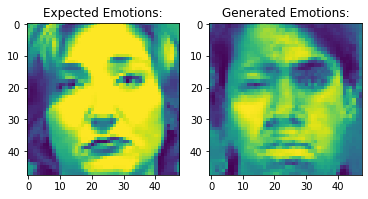

************43*************
Label:  0
(48, 48)


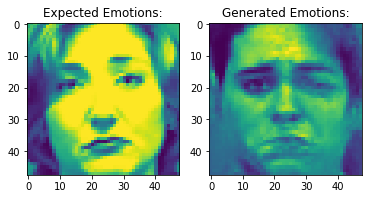

************44*************
Label:  0
(48, 48)


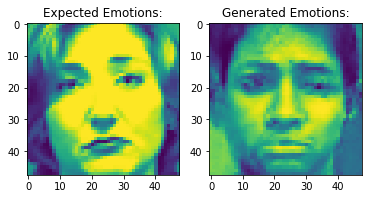

************45*************
Label:  0
(48, 48)


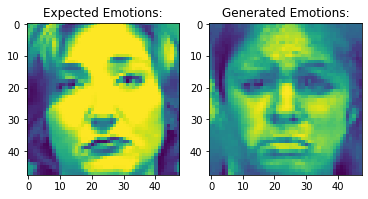

************46*************
Label:  0
(48, 48)


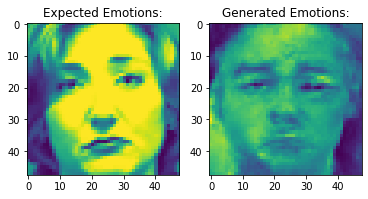

************47*************
Label:  0
(48, 48)


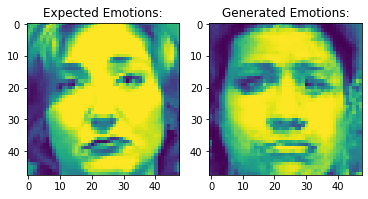

************48*************
Label:  0
(48, 48)


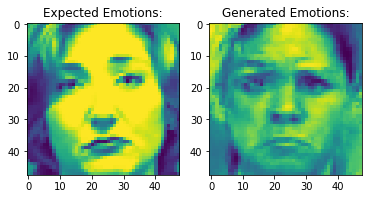

************49*************
Label:  0
(48, 48)


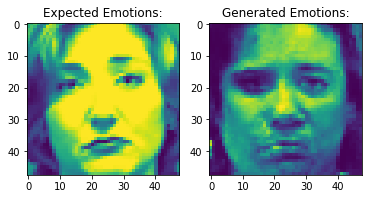

************50*************
Label:  0
(48, 48)


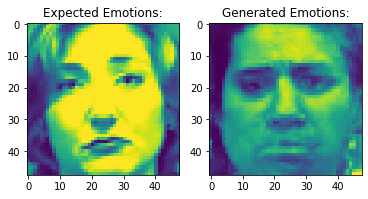

In [32]:
# Sadness:

model = load_model('cgan_generator_2000.h5')
# generate 50 images of sadness
latent_points, labels = generate_latent_points(100, 50)
# specify labels
labels = np.random.randint(0,1,size = 50)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 50, labels)

************1*************
Label:  1
(48, 48)


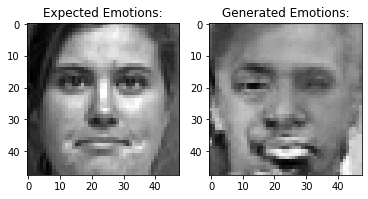

************2*************
Label:  1
(48, 48)


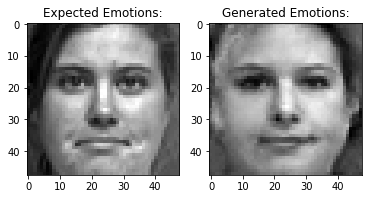

************3*************
Label:  1
(48, 48)


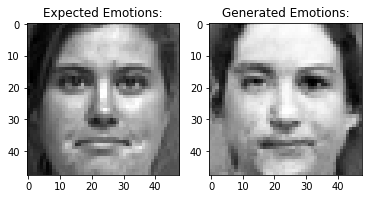

************4*************
Label:  1
(48, 48)


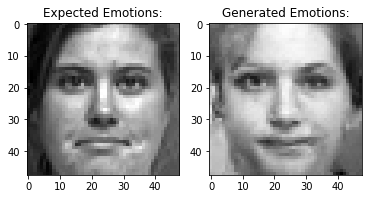

************5*************
Label:  1
(48, 48)


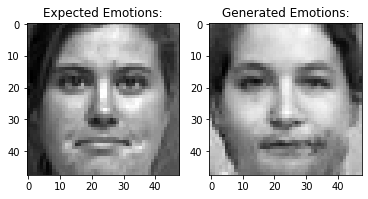

************6*************
Label:  1
(48, 48)


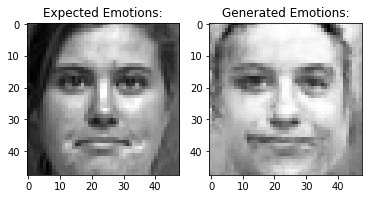

************7*************
Label:  1
(48, 48)


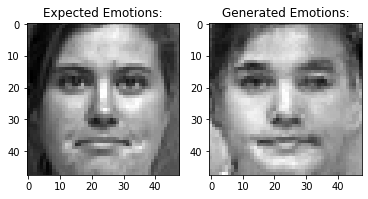

************8*************
Label:  1
(48, 48)


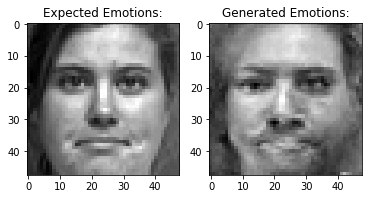

************9*************
Label:  1
(48, 48)


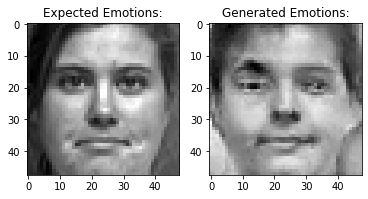

************10*************
Label:  1
(48, 48)


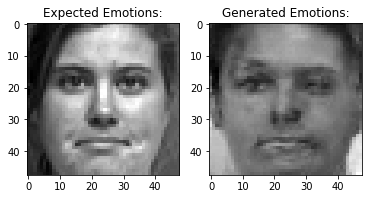

************11*************
Label:  1
(48, 48)


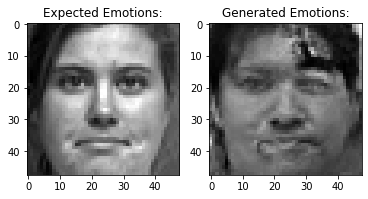

************12*************
Label:  1
(48, 48)


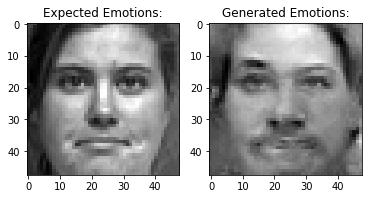

************13*************
Label:  1
(48, 48)


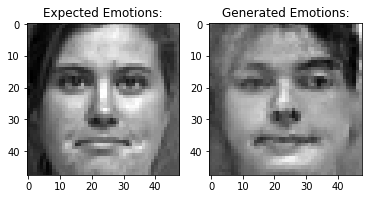

************14*************
Label:  1
(48, 48)


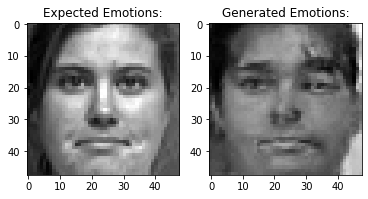

************15*************
Label:  1
(48, 48)


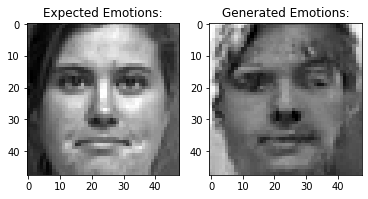

************16*************
Label:  1
(48, 48)


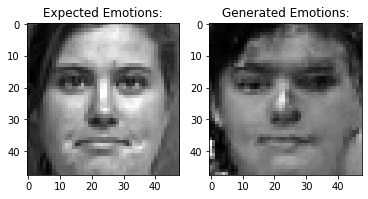

************17*************
Label:  1
(48, 48)


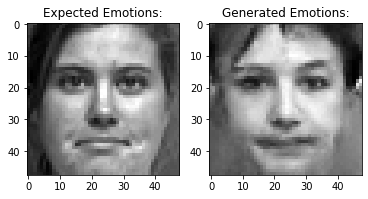

************18*************
Label:  1
(48, 48)


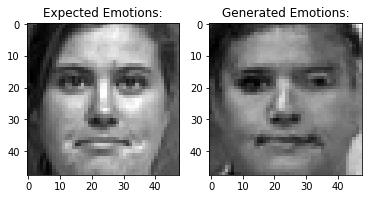

************19*************
Label:  1
(48, 48)


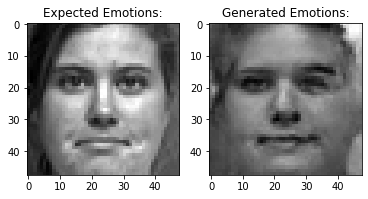

************20*************
Label:  1
(48, 48)


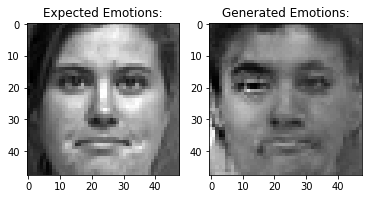

************21*************
Label:  1
(48, 48)


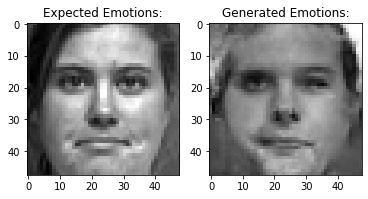

************22*************
Label:  1
(48, 48)


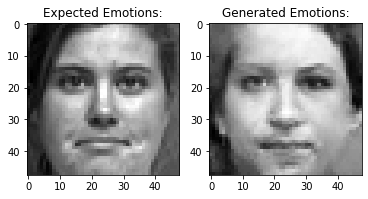

************23*************
Label:  1
(48, 48)


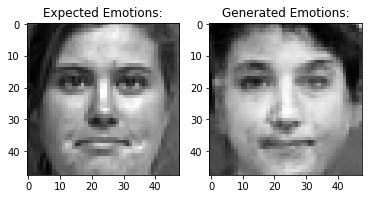

************24*************
Label:  1
(48, 48)


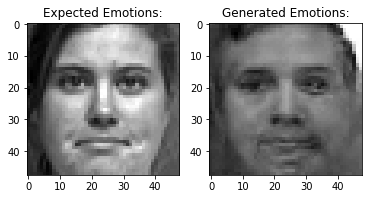

************25*************
Label:  1
(48, 48)


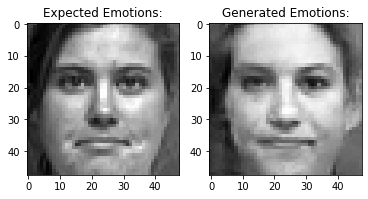

************26*************
Label:  1
(48, 48)


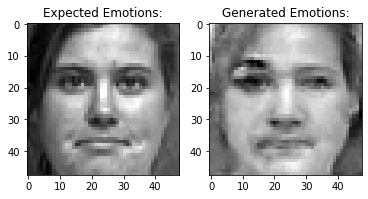

************27*************
Label:  1
(48, 48)


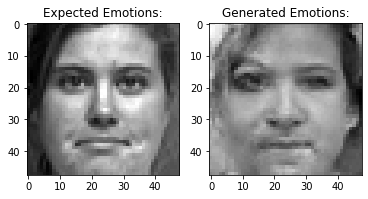

************28*************
Label:  1
(48, 48)


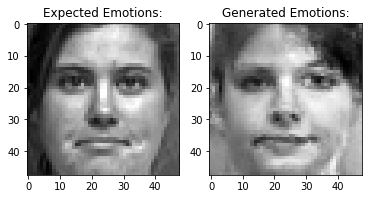

************29*************
Label:  1
(48, 48)


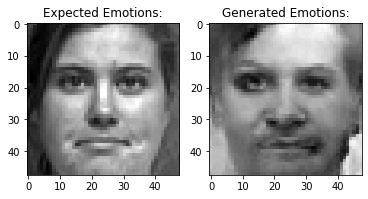

************30*************
Label:  1
(48, 48)


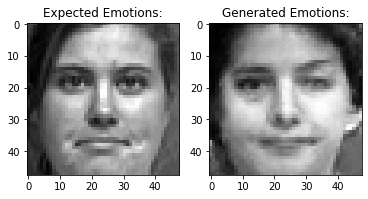

************31*************
Label:  1
(48, 48)


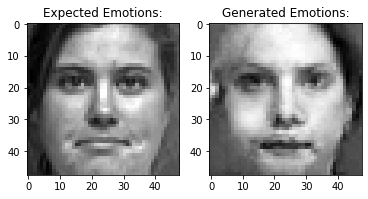

************32*************
Label:  1
(48, 48)


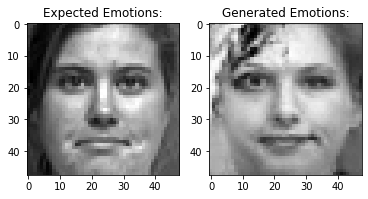

************33*************
Label:  1
(48, 48)


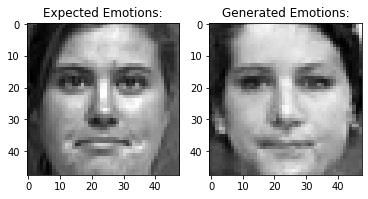

************34*************
Label:  1
(48, 48)


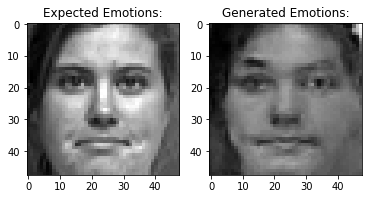

************35*************
Label:  1
(48, 48)


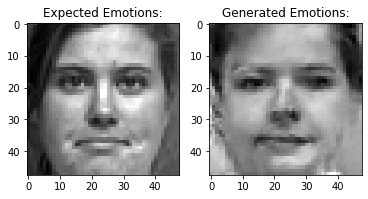

************36*************
Label:  1
(48, 48)


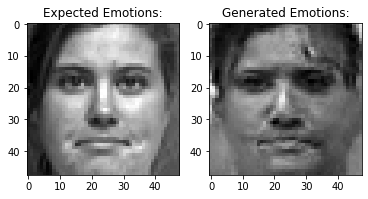

************37*************
Label:  1
(48, 48)


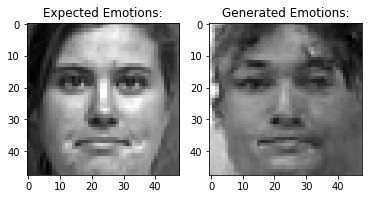

************38*************
Label:  1
(48, 48)


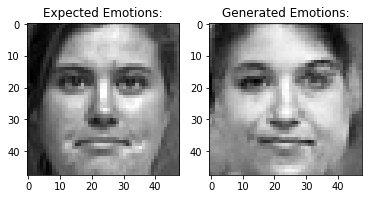

************39*************
Label:  1
(48, 48)


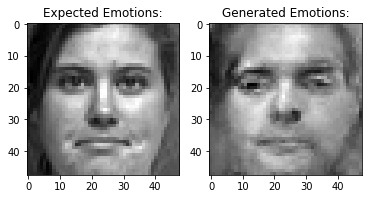

************40*************
Label:  1
(48, 48)


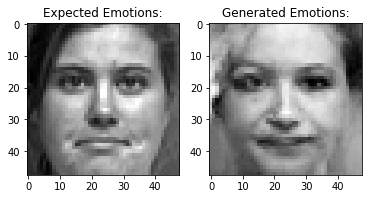

************41*************
Label:  1
(48, 48)


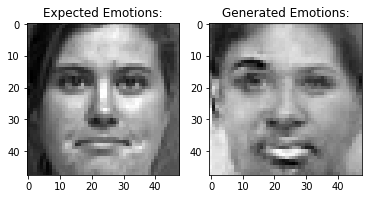

************42*************
Label:  1
(48, 48)


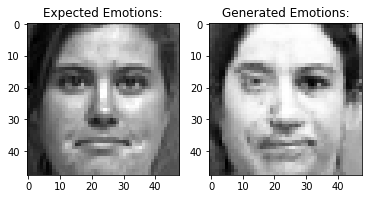

************43*************
Label:  1
(48, 48)


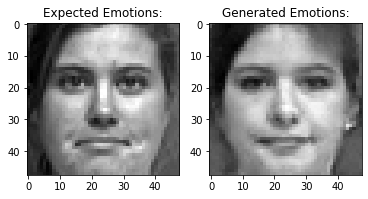

************44*************
Label:  1
(48, 48)


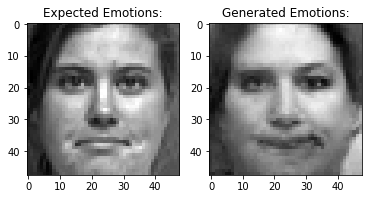

************45*************
Label:  1
(48, 48)


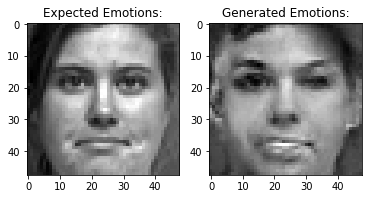

************46*************
Label:  1
(48, 48)


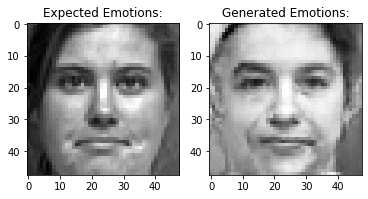

************47*************
Label:  1
(48, 48)


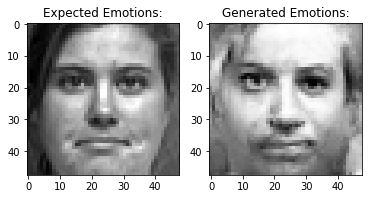

************48*************
Label:  1
(48, 48)


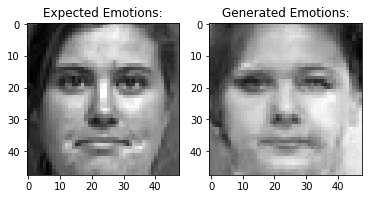

************49*************
Label:  1
(48, 48)


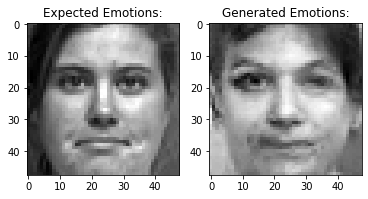

************50*************
Label:  1
(48, 48)


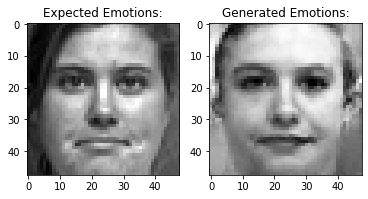

In [50]:
# Contempt:

model = load_model('cgan_generator_2000.h5')
# generate 50 images of contempt
latent_points, labels = generate_latent_points(100, 50)
# specify labels
labels = np.random.randint(1,2,size = 50)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 50, labels)

************1*************
Label:  2
(48, 48)


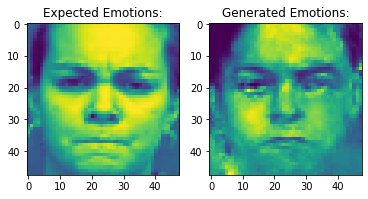

************2*************
Label:  2
(48, 48)


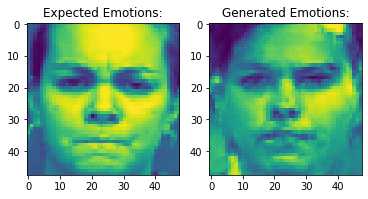

************3*************
Label:  2
(48, 48)


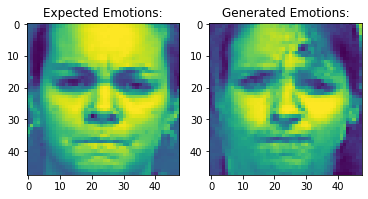

************4*************
Label:  2
(48, 48)


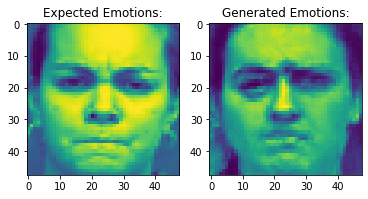

************5*************
Label:  2
(48, 48)


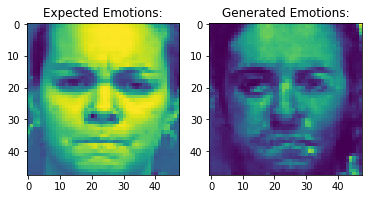

************6*************
Label:  2
(48, 48)


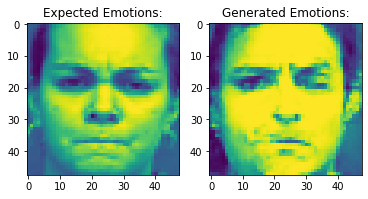

************7*************
Label:  2
(48, 48)


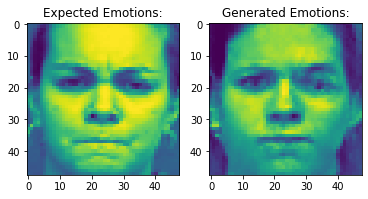

************8*************
Label:  2
(48, 48)


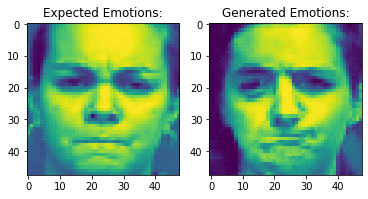

************9*************
Label:  2
(48, 48)


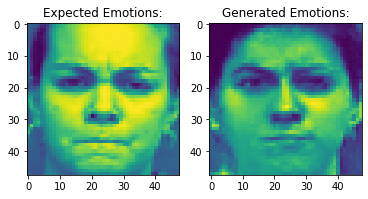

************10*************
Label:  2
(48, 48)


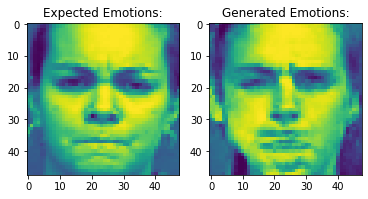

************11*************
Label:  2
(48, 48)


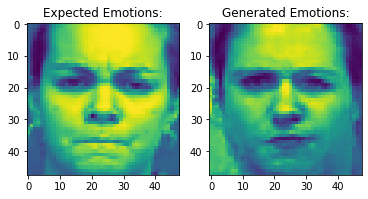

************12*************
Label:  2
(48, 48)


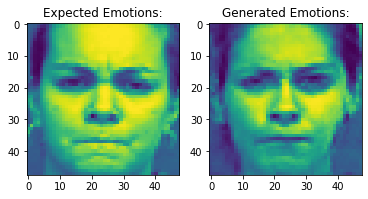

************13*************
Label:  2
(48, 48)


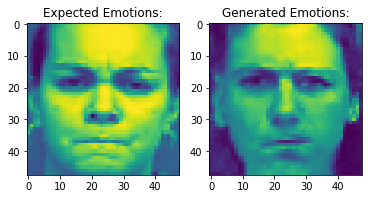

************14*************
Label:  2
(48, 48)


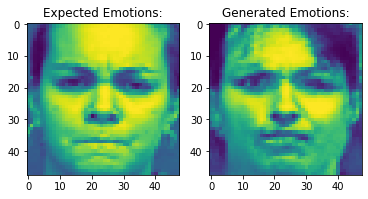

************15*************
Label:  2
(48, 48)


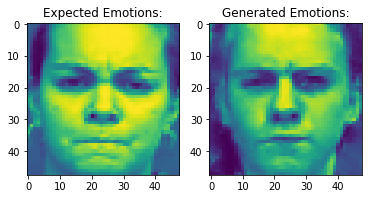

************16*************
Label:  2
(48, 48)


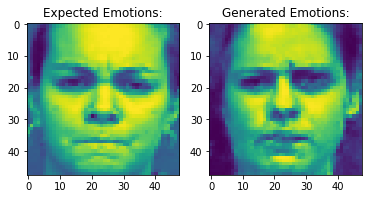

************17*************
Label:  2
(48, 48)


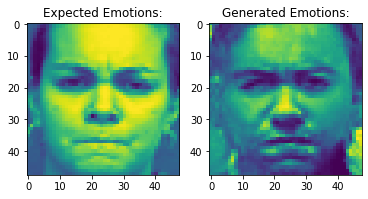

************18*************
Label:  2
(48, 48)


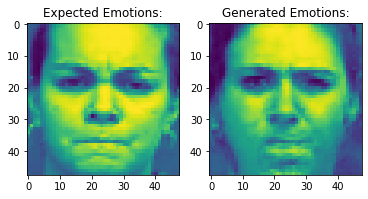

************19*************
Label:  2
(48, 48)


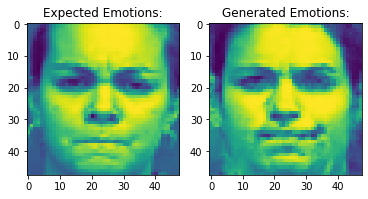

************20*************
Label:  2
(48, 48)


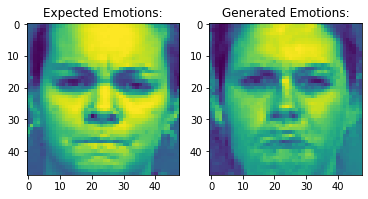

In [34]:
# anger:

model = load_model('cgan_generator_2000.h5')
# generate 20 images of anger
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(2,3,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

In [35]:
lt

{0: 'sadness',
 1: 'contempt',
 2: 'anger',
 3: 'happy',
 4: 'disgust',
 5: 'surprise',
 6: 'fear'}

************1*************
Label:  3
(48, 48)


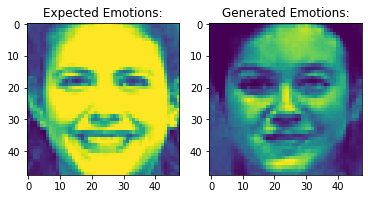

************2*************
Label:  3
(48, 48)


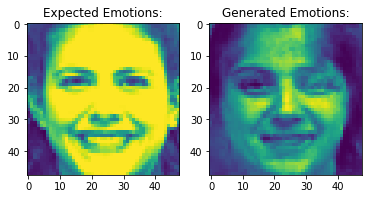

************3*************
Label:  3
(48, 48)


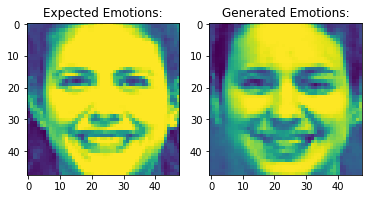

************4*************
Label:  3
(48, 48)


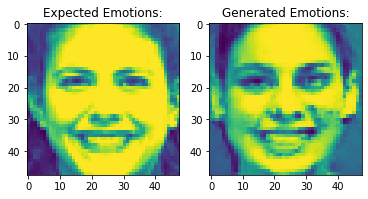

************5*************
Label:  3
(48, 48)


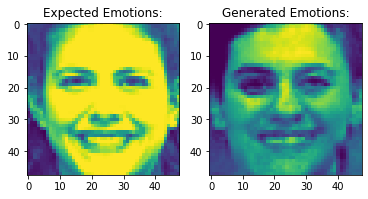

************6*************
Label:  3
(48, 48)


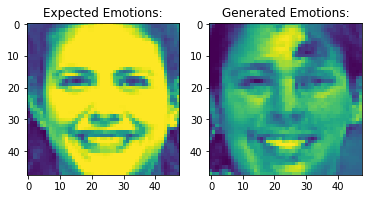

************7*************
Label:  3
(48, 48)


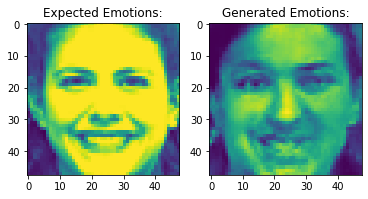

************8*************
Label:  3
(48, 48)


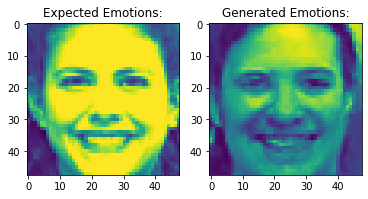

************9*************
Label:  3
(48, 48)


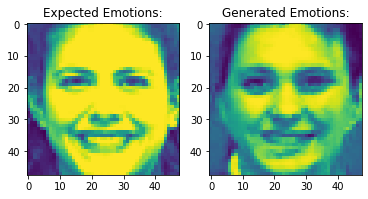

************10*************
Label:  3
(48, 48)


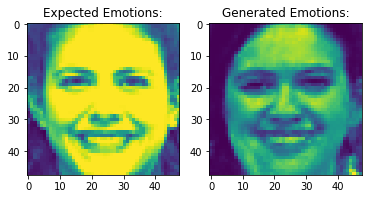

************11*************
Label:  3
(48, 48)


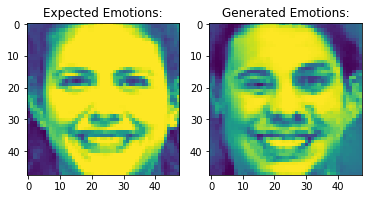

************12*************
Label:  3
(48, 48)


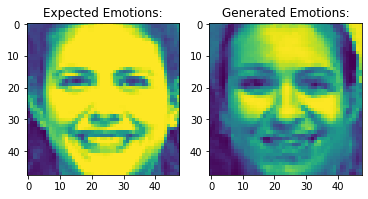

************13*************
Label:  3
(48, 48)


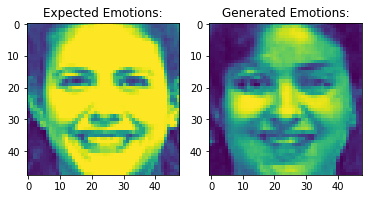

************14*************
Label:  3
(48, 48)


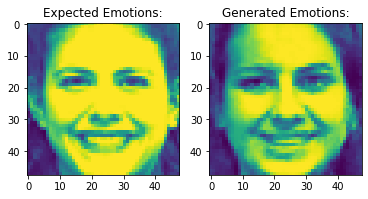

************15*************
Label:  3
(48, 48)


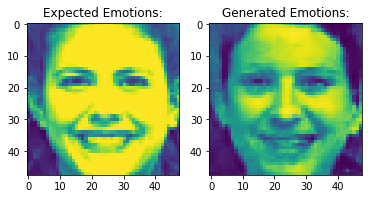

************16*************
Label:  3
(48, 48)


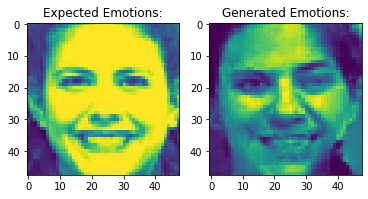

************17*************
Label:  3
(48, 48)


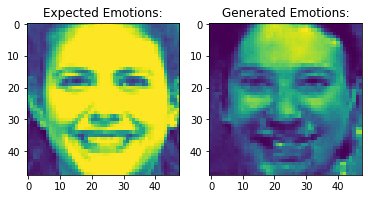

************18*************
Label:  3
(48, 48)


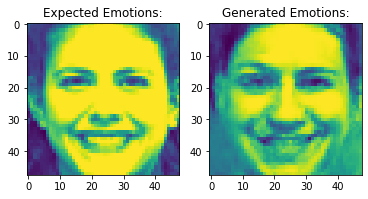

************19*************
Label:  3
(48, 48)


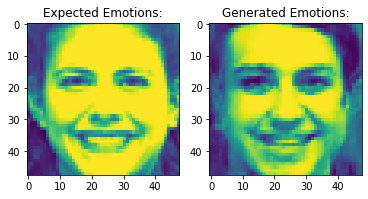

************20*************
Label:  3
(48, 48)


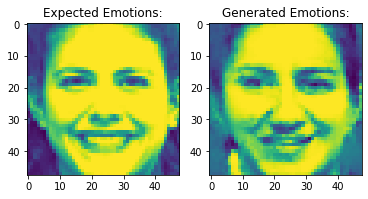

In [36]:
# happy:

model = load_model('cgan_generator_2000.h5')
# generate 20 images of happy
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(3,4,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

In [37]:
lt

{0: 'sadness',
 1: 'contempt',
 2: 'anger',
 3: 'happy',
 4: 'disgust',
 5: 'surprise',
 6: 'fear'}

************1*************
Label:  4
(48, 48)


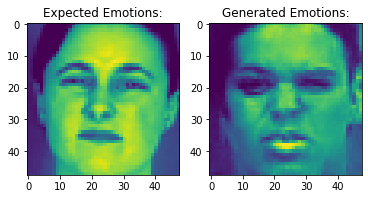

************2*************
Label:  4
(48, 48)


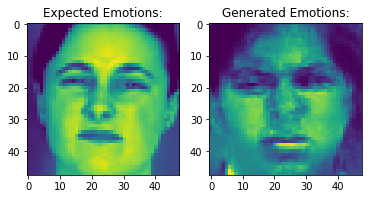

************3*************
Label:  4
(48, 48)


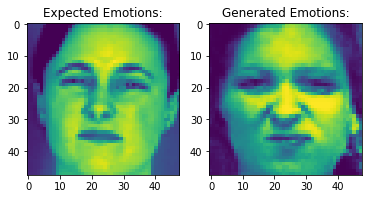

************4*************
Label:  4
(48, 48)


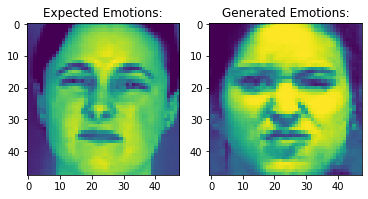

************5*************
Label:  4
(48, 48)


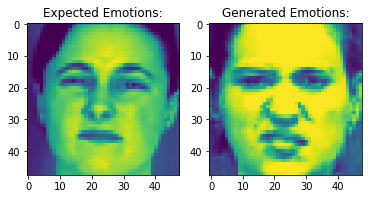

************6*************
Label:  4
(48, 48)


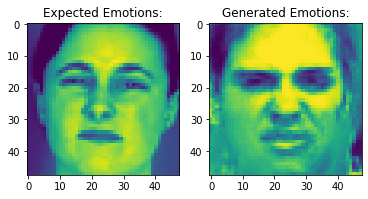

************7*************
Label:  4
(48, 48)


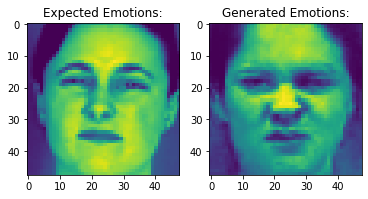

************8*************
Label:  4
(48, 48)


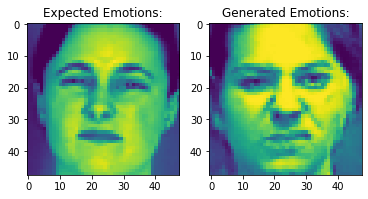

************9*************
Label:  4
(48, 48)


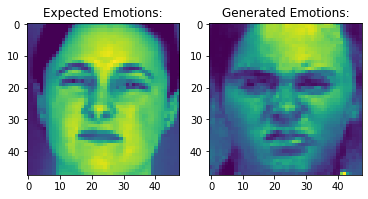

************10*************
Label:  4
(48, 48)


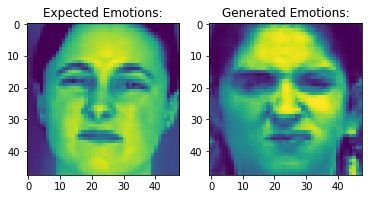

************11*************
Label:  4
(48, 48)


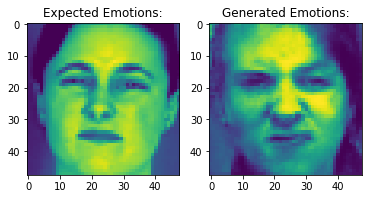

************12*************
Label:  4
(48, 48)


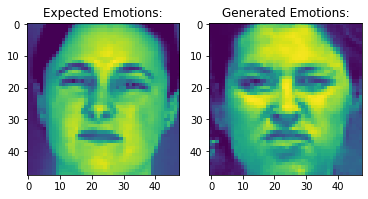

************13*************
Label:  4
(48, 48)


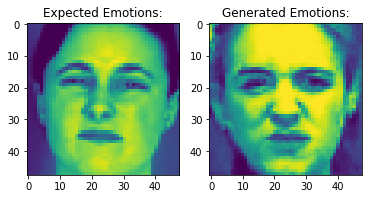

************14*************
Label:  4
(48, 48)


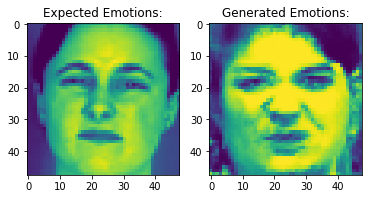

************15*************
Label:  4
(48, 48)


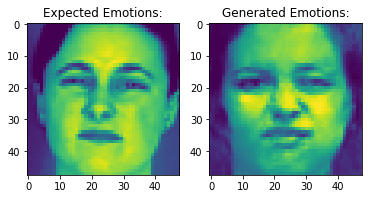

************16*************
Label:  4
(48, 48)


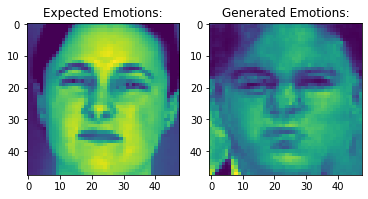

************17*************
Label:  4
(48, 48)


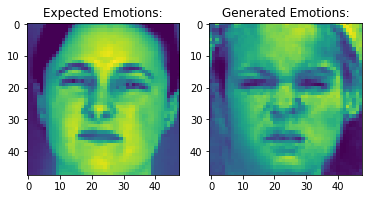

************18*************
Label:  4
(48, 48)


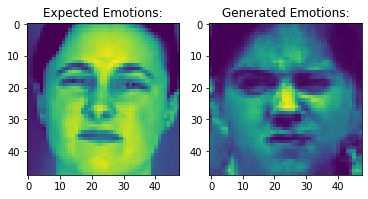

************19*************
Label:  4
(48, 48)


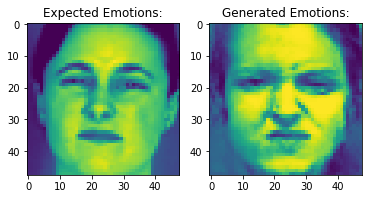

************20*************
Label:  4
(48, 48)


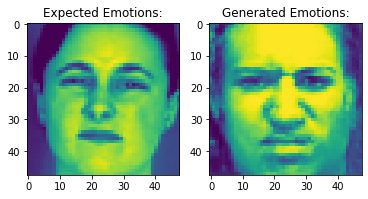

In [39]:
# disgust:

model = load_model('cgan_generator_2000.h5')
# generate 20 images of disgust
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(4,5,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

In [40]:
lt

{0: 'sadness',
 1: 'contempt',
 2: 'anger',
 3: 'happy',
 4: 'disgust',
 5: 'surprise',
 6: 'fear'}

************1*************
Label:  5
(48, 48)


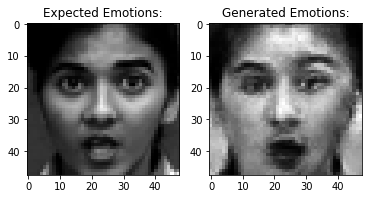

************2*************
Label:  5
(48, 48)


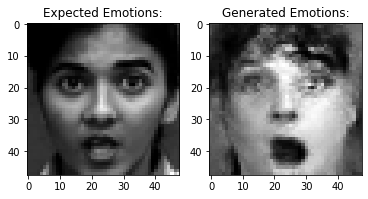

************3*************
Label:  5
(48, 48)


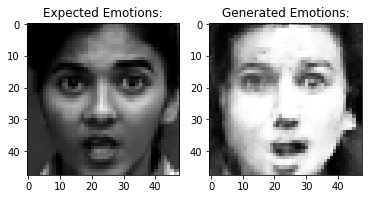

************4*************
Label:  5
(48, 48)


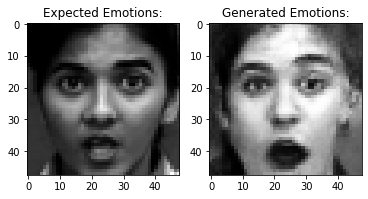

************5*************
Label:  5
(48, 48)


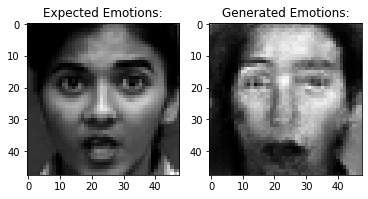

************6*************
Label:  5
(48, 48)


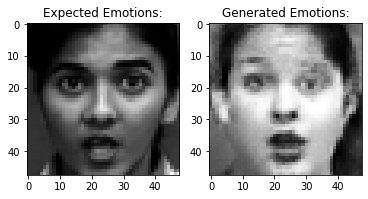

************7*************
Label:  5
(48, 48)


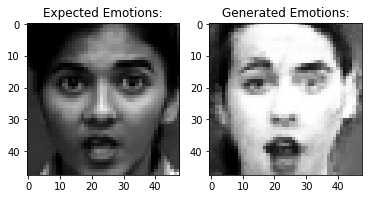

************8*************
Label:  5
(48, 48)


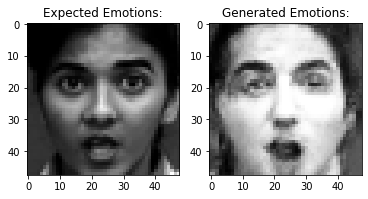

************9*************
Label:  5
(48, 48)


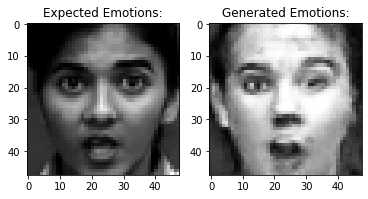

************10*************
Label:  5
(48, 48)


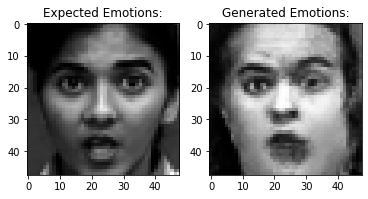

************11*************
Label:  5
(48, 48)


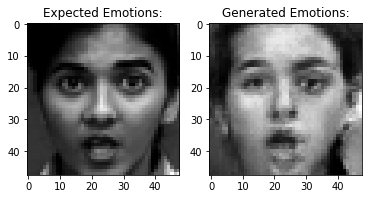

************12*************
Label:  5
(48, 48)


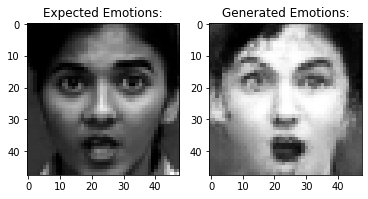

************13*************
Label:  5
(48, 48)


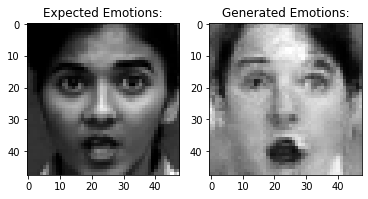

************14*************
Label:  5
(48, 48)


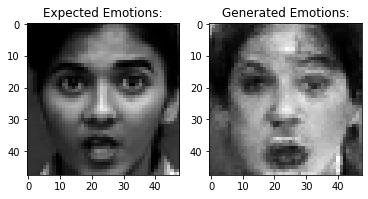

************15*************
Label:  5
(48, 48)


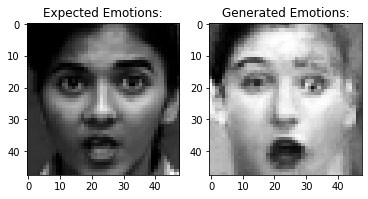

************16*************
Label:  5
(48, 48)


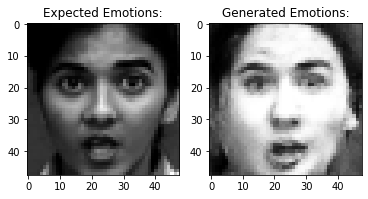

************17*************
Label:  5
(48, 48)


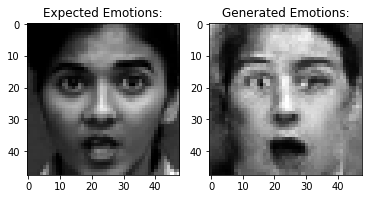

************18*************
Label:  5
(48, 48)


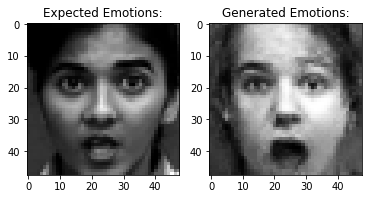

************19*************
Label:  5
(48, 48)


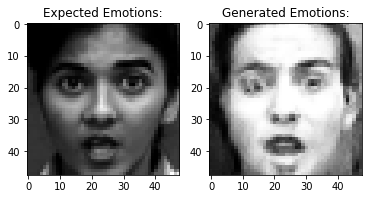

************20*************
Label:  5
(48, 48)


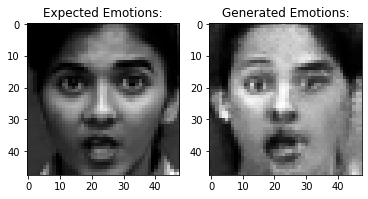

************21*************
Label:  5
(48, 48)


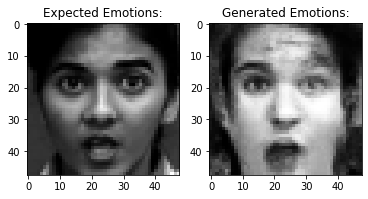

************22*************
Label:  5
(48, 48)


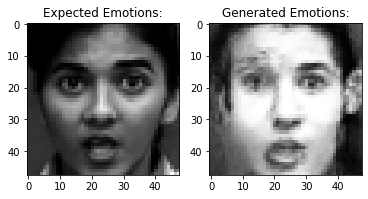

************23*************
Label:  5
(48, 48)


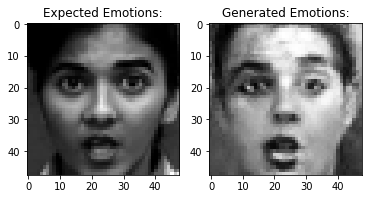

************24*************
Label:  5
(48, 48)


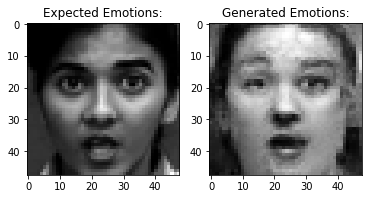

************25*************
Label:  5
(48, 48)


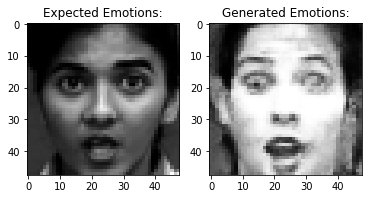

************26*************
Label:  5
(48, 48)


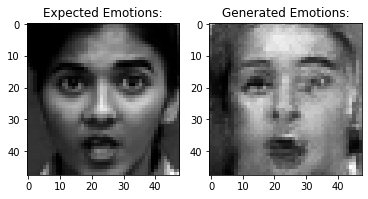

************27*************
Label:  5
(48, 48)


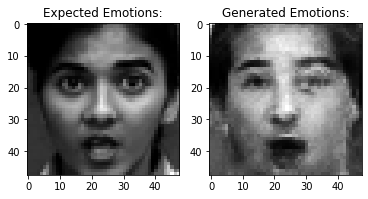

************28*************
Label:  5
(48, 48)


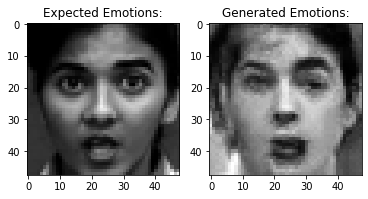

************29*************
Label:  5
(48, 48)


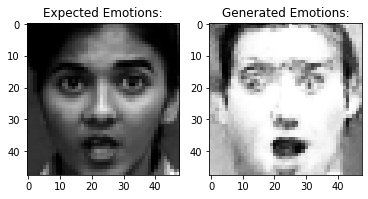

************30*************
Label:  5
(48, 48)


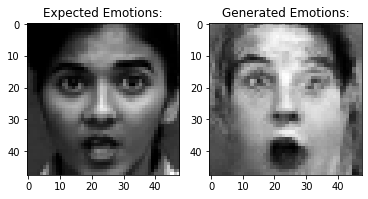

************31*************
Label:  5
(48, 48)


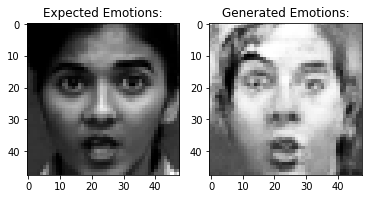

************32*************
Label:  5
(48, 48)


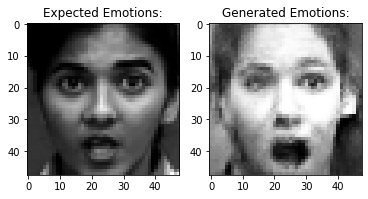

************33*************
Label:  5
(48, 48)


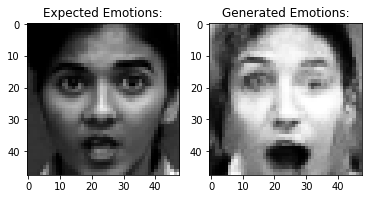

************34*************
Label:  5
(48, 48)


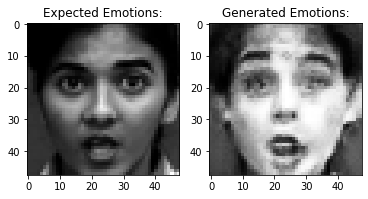

************35*************
Label:  5
(48, 48)


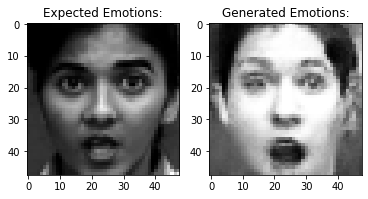

************36*************
Label:  5
(48, 48)


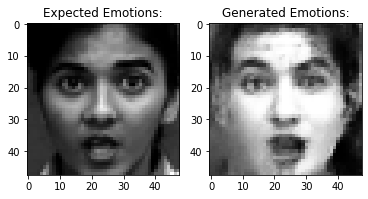

************37*************
Label:  5
(48, 48)


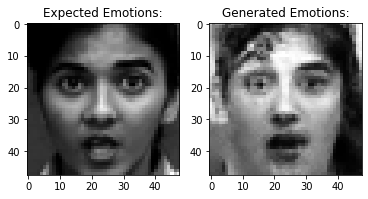

************38*************
Label:  5
(48, 48)


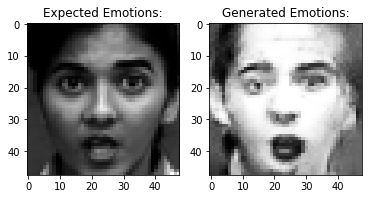

************39*************
Label:  5
(48, 48)


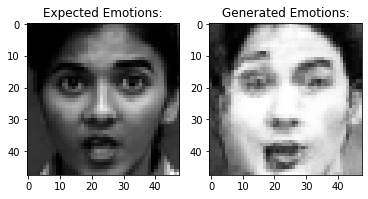

************40*************
Label:  5
(48, 48)


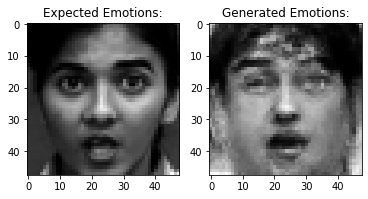

************41*************
Label:  5
(48, 48)


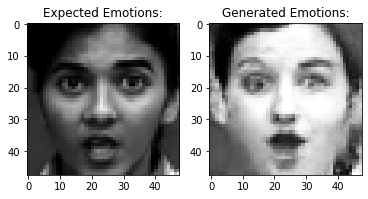

************42*************
Label:  5
(48, 48)


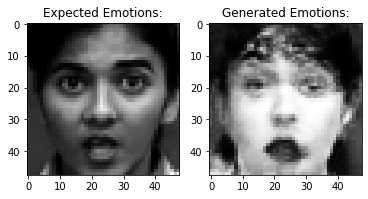

************43*************
Label:  5
(48, 48)


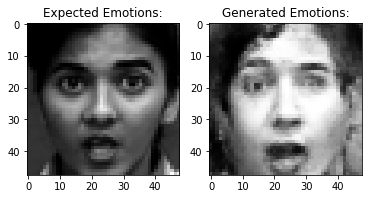

************44*************
Label:  5
(48, 48)


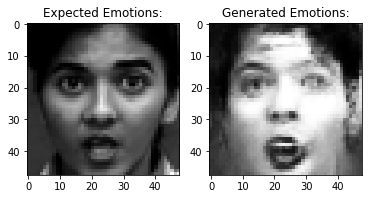

************45*************
Label:  5
(48, 48)


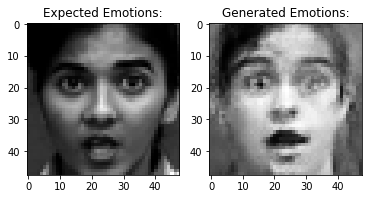

************46*************
Label:  5
(48, 48)


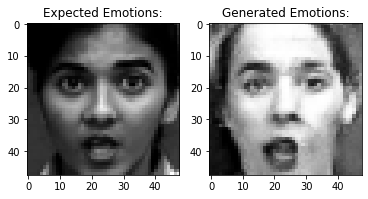

************47*************
Label:  5
(48, 48)


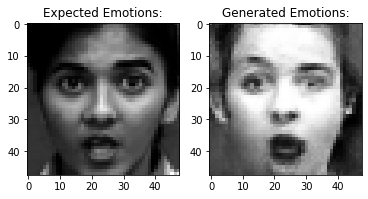

************48*************
Label:  5
(48, 48)


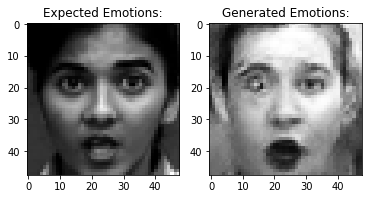

************49*************
Label:  5
(48, 48)


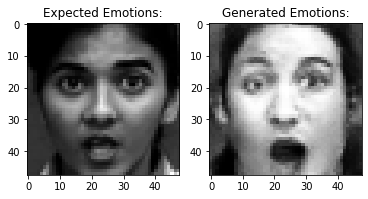

************50*************
Label:  5
(48, 48)


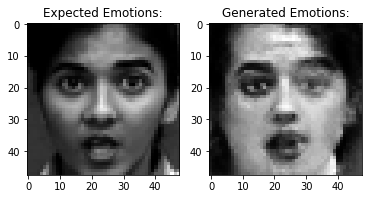

In [53]:
# surprise:

model = load_model('cgan_generator.h5')
# generate 50 images of surprise
latent_points, labels = generate_latent_points(100, 50)
# specify labels
labels = np.random.randint(5,6,size = 50)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 50, labels)

In [42]:
lt

{0: 'sadness',
 1: 'contempt',
 2: 'anger',
 3: 'happy',
 4: 'disgust',
 5: 'surprise',
 6: 'fear'}

************1*************
Label:  6
(48, 48)


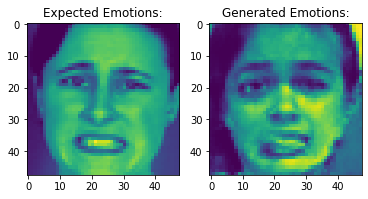

************2*************
Label:  6
(48, 48)


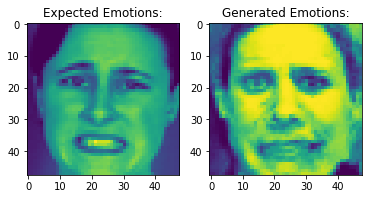

************3*************
Label:  6
(48, 48)


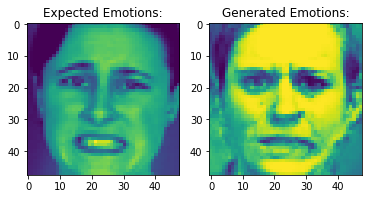

************4*************
Label:  6
(48, 48)


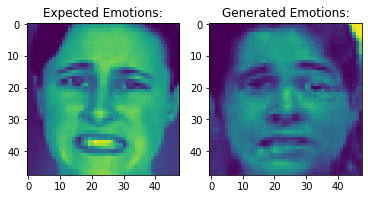

************5*************
Label:  6
(48, 48)


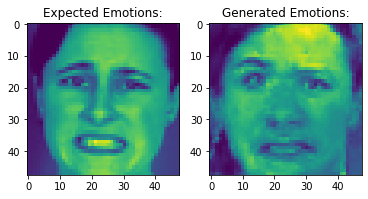

************6*************
Label:  6
(48, 48)


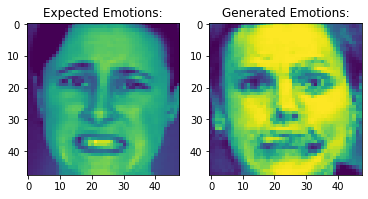

************7*************
Label:  6
(48, 48)


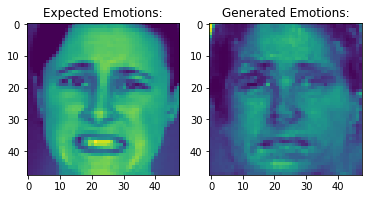

************8*************
Label:  6
(48, 48)


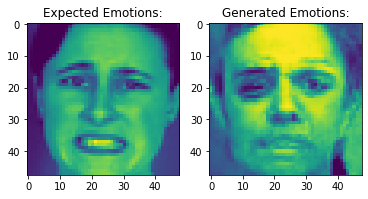

************9*************
Label:  6
(48, 48)


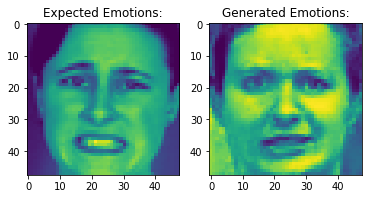

************10*************
Label:  6
(48, 48)


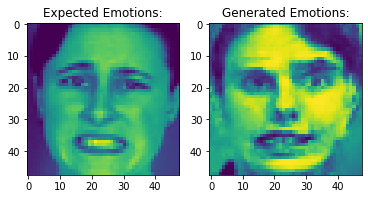

************11*************
Label:  6
(48, 48)


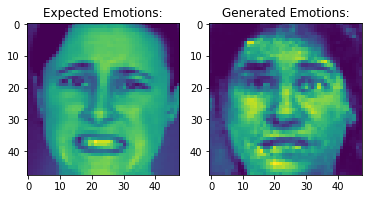

************12*************
Label:  6
(48, 48)


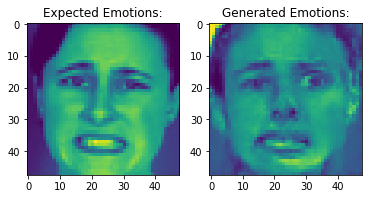

************13*************
Label:  6
(48, 48)


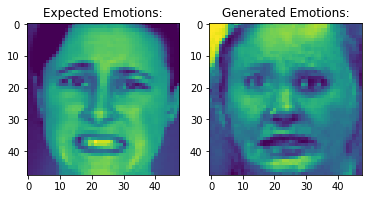

************14*************
Label:  6
(48, 48)


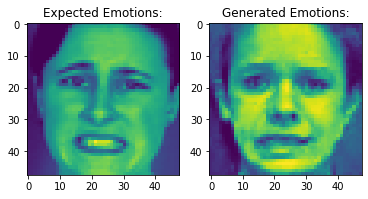

************15*************
Label:  6
(48, 48)


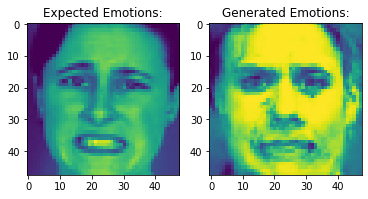

************16*************
Label:  6
(48, 48)


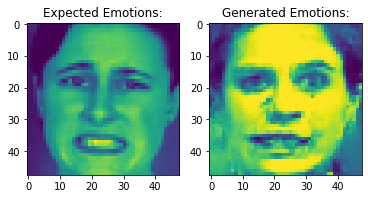

************17*************
Label:  6
(48, 48)


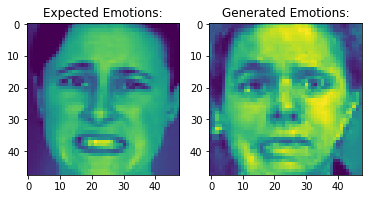

************18*************
Label:  6
(48, 48)


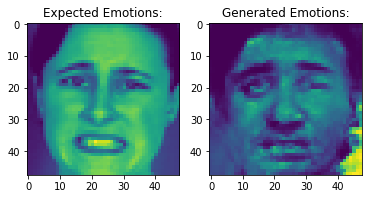

************19*************
Label:  6
(48, 48)


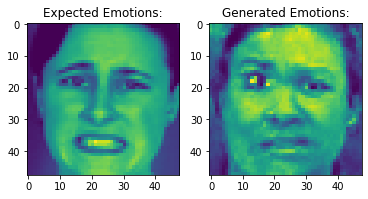

************20*************
Label:  6
(48, 48)


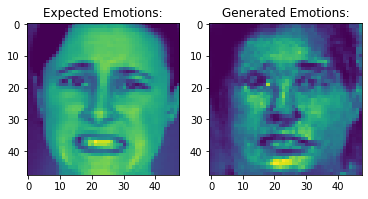

In [43]:
# fear:

model = load_model('cgan_generator_2000.h5')
# generate 20 images of fear
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(6,7,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

# Good performance so far, but sad can improve. 

# Training for 1000 more epochs

In [44]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=14):
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  #print(bat_per_epo)
  half_batch = int(n_batch / 2)
  #print(bat_per_epo, half_batch)
  #print(half_batch)

  # manually enumerate epochs
  for i in range(n_epochs):
    #print('Hello')
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      #print('here')
      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		  # update discriminator model weights
      #print('Hello')

      d_loss1, d_acc1 = d_model.train_on_batch([X_real, labels_real], y_real)
      #print('hi')
		  # generate 'fake' examples
      [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		  # update discriminator model weights

      d_loss2, d_acc2 = d_model.train_on_batch([X_fake, labels], y_fake)
		  # prepare points in latent space as input for the generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
		  # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
		  # update the generator via the discriminator's error
      g_loss= gan_model.train_on_batch([z_input, labels_input], y_gan)
		  # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d1acc = %.3f, d2=%.3f, d2acc = %.3f,gloss=%.3f' %
		    (i+1, j+1, bat_per_epo, d_loss1, d_acc1, d_loss2, d_acc2,g_loss))
  # save the generator model
  g_model.save('cgan_generator_3000.h5')
  
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000)

Streaming output truncated to the last 5000 lines.
>723, 6/18, d1=0.162, d1acc = 1.000, d2=0.296, d2acc = 0.857,gloss=2.838
>723, 7/18, d1=0.418, d1acc = 0.857, d2=0.328, d2acc = 0.857,gloss=2.427
>723, 8/18, d1=0.356, d1acc = 0.714, d2=0.304, d2acc = 0.857,gloss=1.926
>723, 9/18, d1=0.066, d1acc = 1.000, d2=0.551, d2acc = 0.714,gloss=2.735
>723, 10/18, d1=0.268, d1acc = 0.857, d2=0.284, d2acc = 0.857,gloss=2.639
>723, 11/18, d1=0.254, d1acc = 0.857, d2=0.146, d2acc = 1.000,gloss=2.759
>723, 12/18, d1=0.615, d1acc = 0.429, d2=0.290, d2acc = 1.000,gloss=2.224
>723, 13/18, d1=0.316, d1acc = 0.857, d2=0.264, d2acc = 0.857,gloss=2.026
>723, 14/18, d1=0.255, d1acc = 0.857, d2=0.512, d2acc = 0.857,gloss=2.778
>723, 15/18, d1=0.096, d1acc = 1.000, d2=0.245, d2acc = 0.857,gloss=2.911
>723, 16/18, d1=0.325, d1acc = 0.857, d2=0.506, d2acc = 0.857,gloss=2.844
>723, 17/18, d1=0.188, d1acc = 1.000, d2=0.135, d2acc = 1.000,gloss=2.864
>723, 18/18, d1=0.607, d1acc = 0.857, d2=0.186, d2acc = 1.000,glo

************1*************
Label:  0
(48, 48)


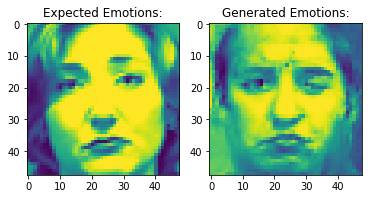

************2*************
Label:  0
(48, 48)


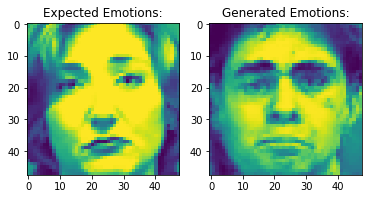

************3*************
Label:  0
(48, 48)


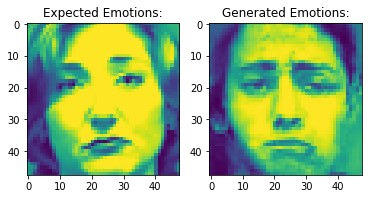

************4*************
Label:  0
(48, 48)


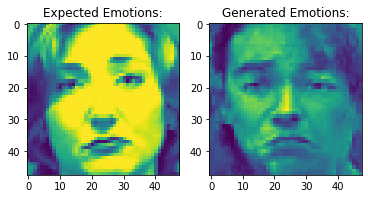

************5*************
Label:  0
(48, 48)


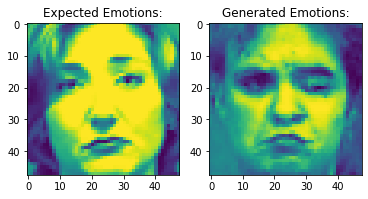

************6*************
Label:  0
(48, 48)


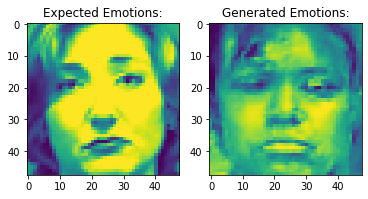

************7*************
Label:  0
(48, 48)


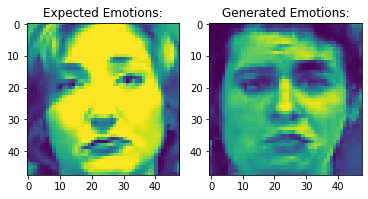

************8*************
Label:  0
(48, 48)


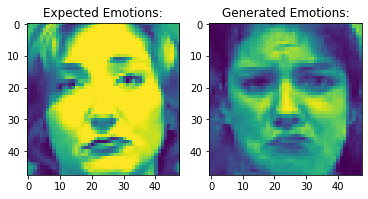

************9*************
Label:  0
(48, 48)


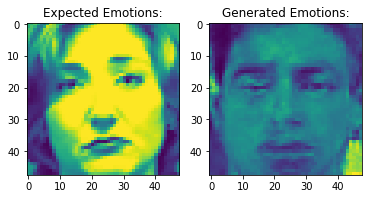

************10*************
Label:  0
(48, 48)


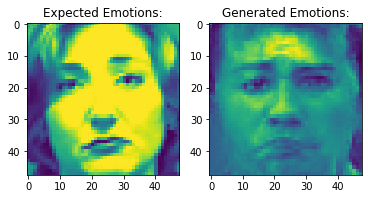

************11*************
Label:  0
(48, 48)


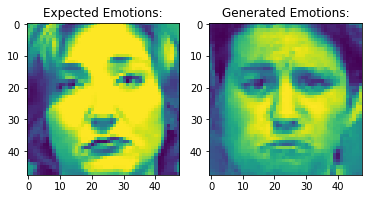

************12*************
Label:  0
(48, 48)


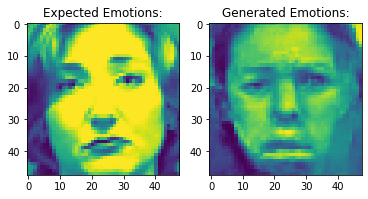

************13*************
Label:  0
(48, 48)


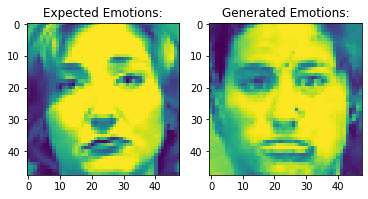

************14*************
Label:  0
(48, 48)


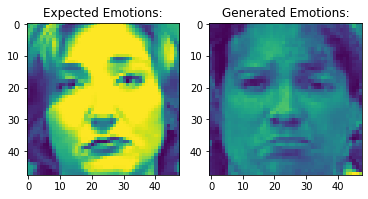

************15*************
Label:  0
(48, 48)


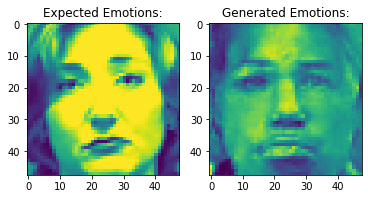

************16*************
Label:  0
(48, 48)


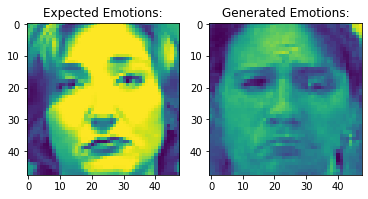

************17*************
Label:  0
(48, 48)


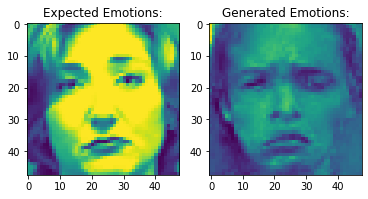

************18*************
Label:  0
(48, 48)


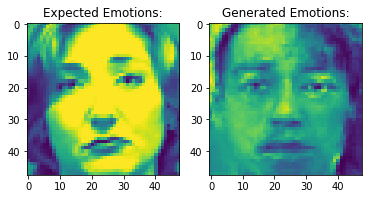

************19*************
Label:  0
(48, 48)


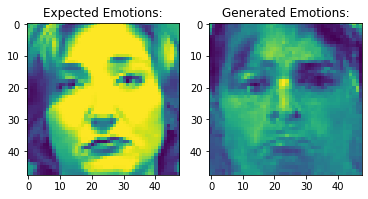

************20*************
Label:  0
(48, 48)


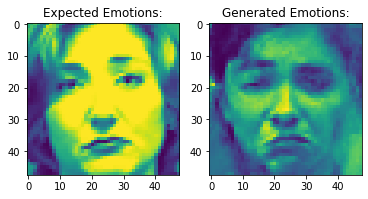

In [45]:
# Sadness:

model = load_model('cgan_generator_3000.h5')
# generate 20 images of sadness
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(0,1,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

************1*************
Label:  0
(48, 48)


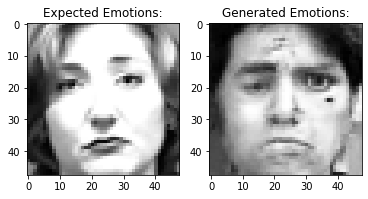

************2*************
Label:  0
(48, 48)


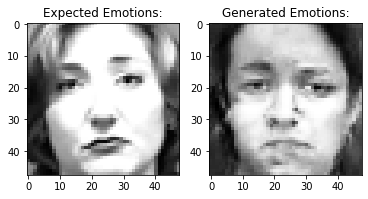

************3*************
Label:  0
(48, 48)


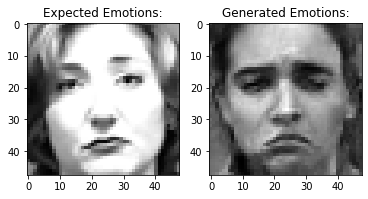

************4*************
Label:  0
(48, 48)


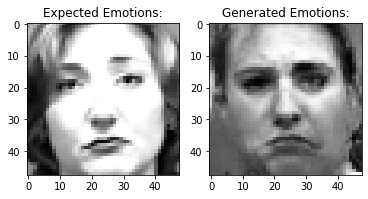

************5*************
Label:  0
(48, 48)


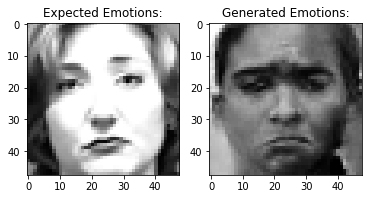

************6*************
Label:  0
(48, 48)


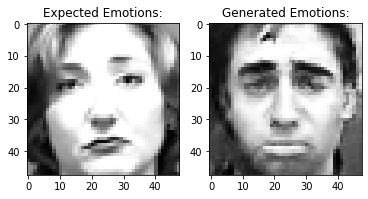

************7*************
Label:  0
(48, 48)


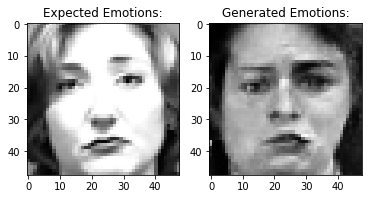

************8*************
Label:  0
(48, 48)


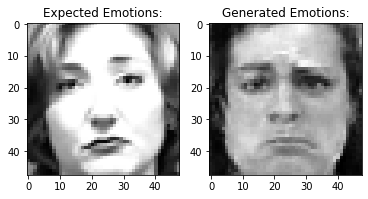

************9*************
Label:  0
(48, 48)


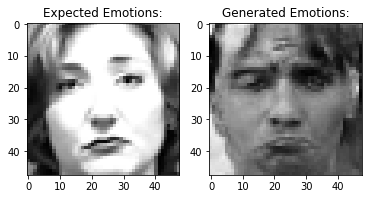

************10*************
Label:  0
(48, 48)


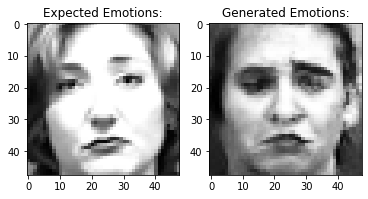

************11*************
Label:  0
(48, 48)


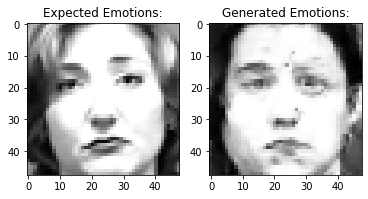

************12*************
Label:  0
(48, 48)


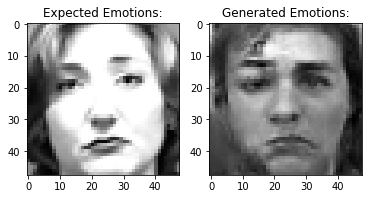

************13*************
Label:  0
(48, 48)


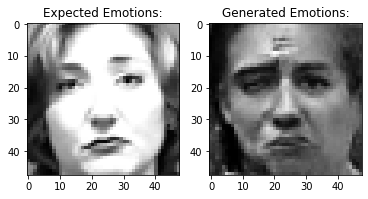

************14*************
Label:  0
(48, 48)


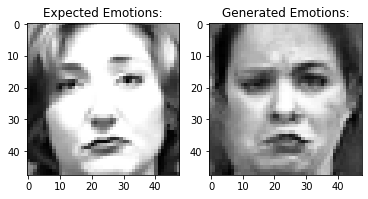

************15*************
Label:  0
(48, 48)


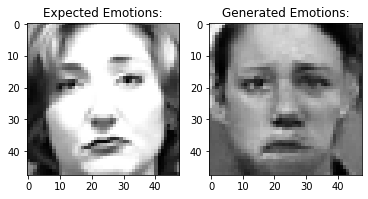

************16*************
Label:  0
(48, 48)


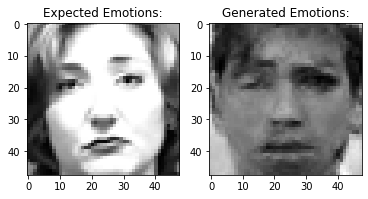

************17*************
Label:  0
(48, 48)


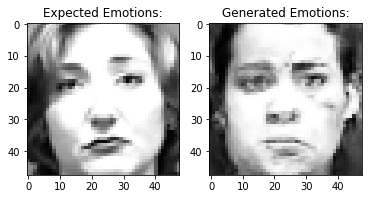

************18*************
Label:  0
(48, 48)


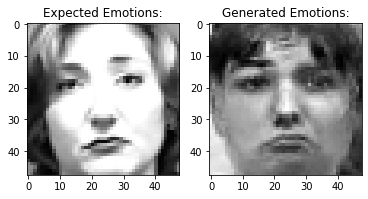

************19*************
Label:  0
(48, 48)


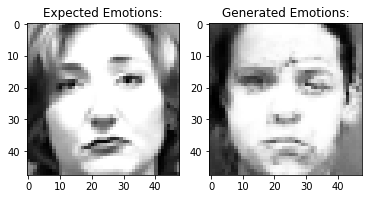

************20*************
Label:  0
(48, 48)


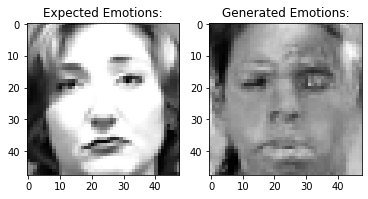

In [54]:
# Sadness:

model = load_model('cgan_generator_3000.h5')
# generate 20 images of sadness
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(0,1,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

************1*************
Label:  1
(48, 48)


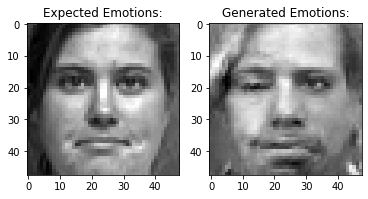

************2*************
Label:  1
(48, 48)


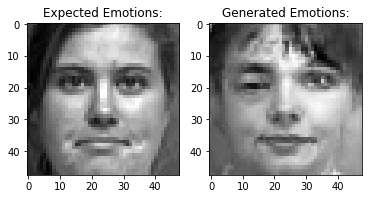

************3*************
Label:  1
(48, 48)


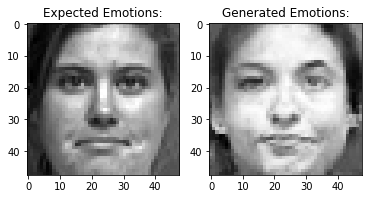

************4*************
Label:  1
(48, 48)


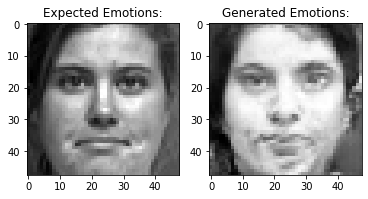

************5*************
Label:  1
(48, 48)


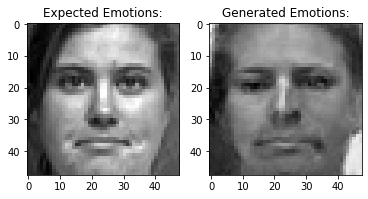

************6*************
Label:  1
(48, 48)


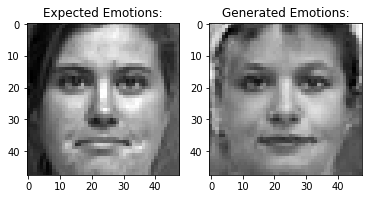

************7*************
Label:  1
(48, 48)


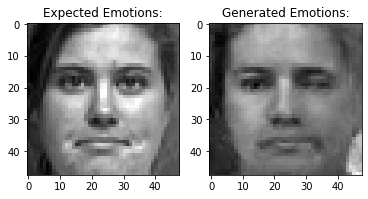

************8*************
Label:  1
(48, 48)


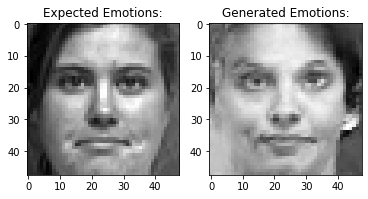

************9*************
Label:  1
(48, 48)


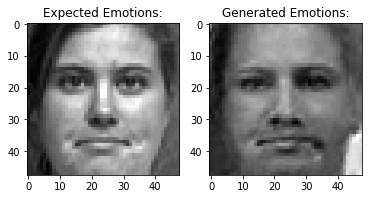

************10*************
Label:  1
(48, 48)


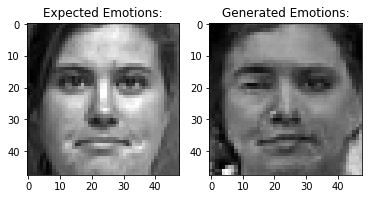

************11*************
Label:  1
(48, 48)


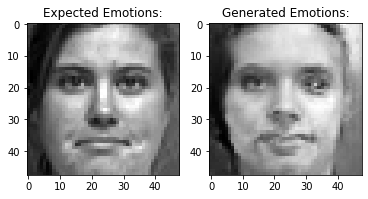

************12*************
Label:  1
(48, 48)


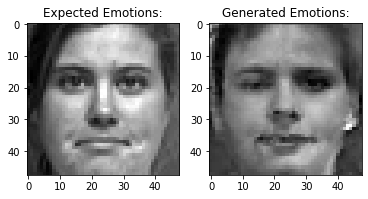

************13*************
Label:  1
(48, 48)


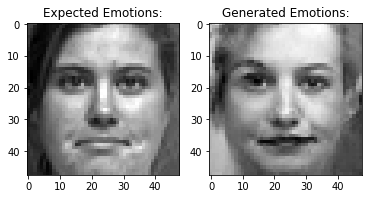

************14*************
Label:  1
(48, 48)


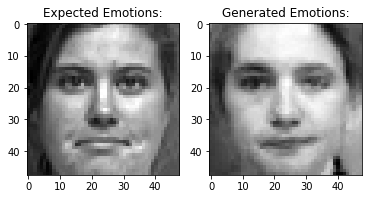

************15*************
Label:  1
(48, 48)


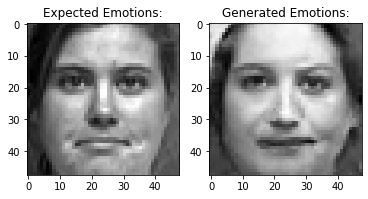

************16*************
Label:  1
(48, 48)


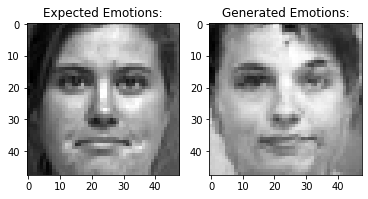

************17*************
Label:  1
(48, 48)


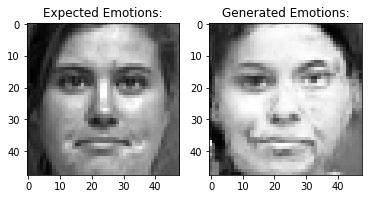

************18*************
Label:  1
(48, 48)


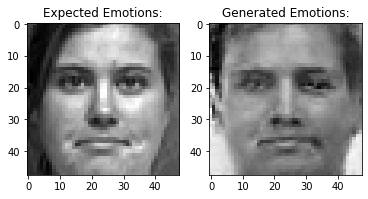

************19*************
Label:  1
(48, 48)


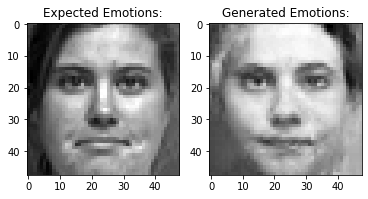

************20*************
Label:  1
(48, 48)


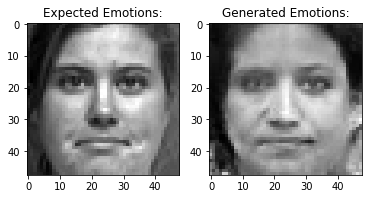

In [51]:
# Sadness:

model = load_model('cgan_generator_3000.h5')
# generate 20 images of sadness
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(1,2,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)

************1*************
Label:  2
(48, 48)


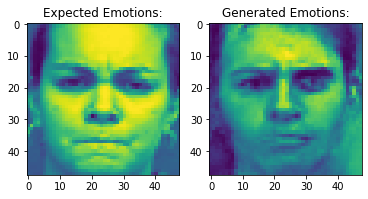

************2*************
Label:  2
(48, 48)


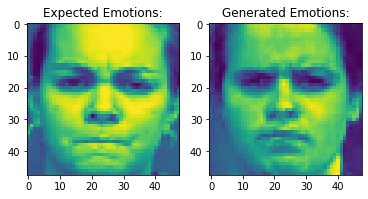

************3*************
Label:  2
(48, 48)


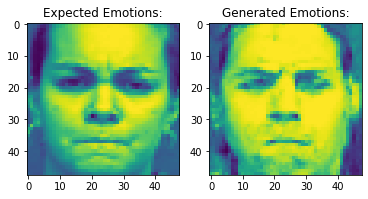

************4*************
Label:  2
(48, 48)


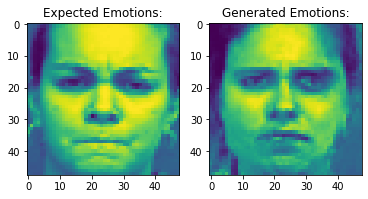

************5*************
Label:  2
(48, 48)


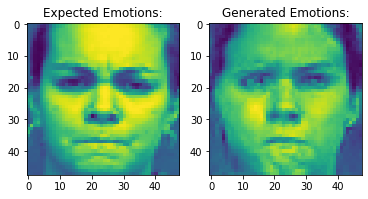

************6*************
Label:  2
(48, 48)


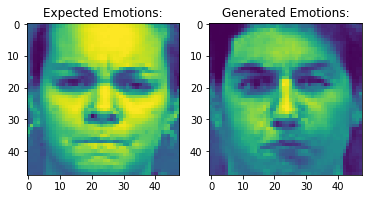

************7*************
Label:  2
(48, 48)


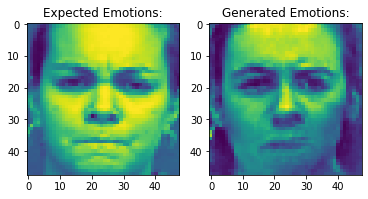

************8*************
Label:  2
(48, 48)


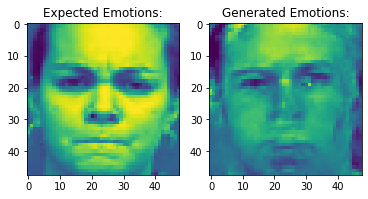

************9*************
Label:  2
(48, 48)


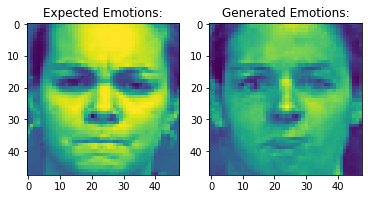

************10*************
Label:  2
(48, 48)


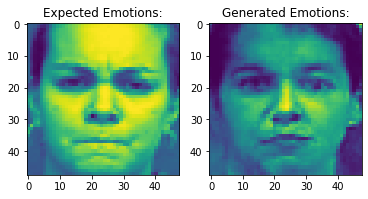

************11*************
Label:  2
(48, 48)


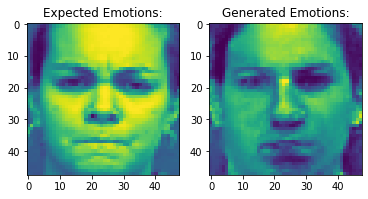

************12*************
Label:  2
(48, 48)


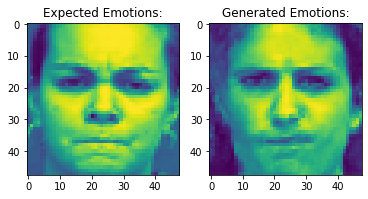

************13*************
Label:  2
(48, 48)


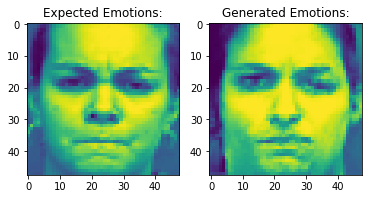

************14*************
Label:  2
(48, 48)


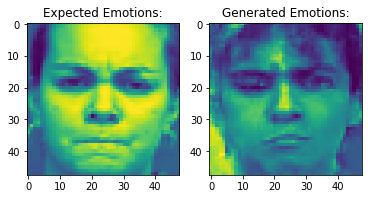

************15*************
Label:  2
(48, 48)


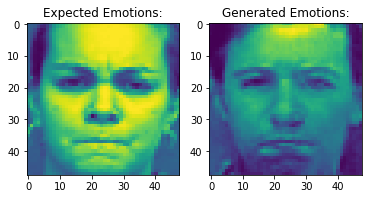

************16*************
Label:  2
(48, 48)


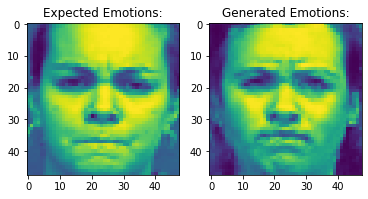

************17*************
Label:  2
(48, 48)


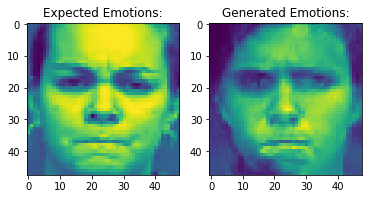

************18*************
Label:  2
(48, 48)


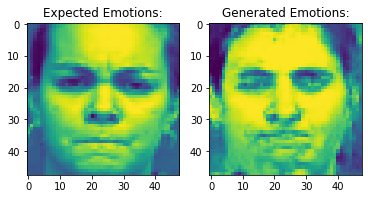

************19*************
Label:  2
(48, 48)


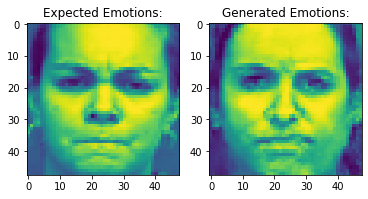

************20*************
Label:  2
(48, 48)


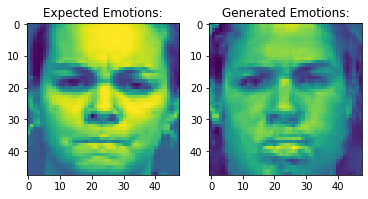

In [48]:
# Sadness:

model = load_model('cgan_generator_3000.h5')
# generate 20 images of sadness
latent_points, labels = generate_latent_points(100, 20)
# specify labels
labels = np.random.randint(2,3,size = 20)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 20, labels)